In [75]:
# import the required libarariers 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [76]:
# present working dir :
%pwd

'C:\\Users\\User\\Desktop\\Capstone Project'

# Preliminary Steps

1. Read all the data set provided
2. Agument the compmnay and Industry typr for the data set if required. 
3. Merge / Collate the data set in to a signle data set for Analysis Purposes

# Data Exploration

1. Client is looking for 5 years of Investment Plan
2. So Remove / filter the data to the latest 5 year for analysis
3. Data preprocessing steps needs to be done for the data , before that do the below 

    3.1 Step 1 from above 
    
    3.2 Identify the company and the industry from the collated data for company-specific and industry analysis. 
    
    3.3 For the daily price / stock analysis , Will be using Close, Volume and Step 3.2 Data , get rid of other readuant data presnet in the data set. 
    
    3.4 For indexing purspoe , Use S&P 500 data proivded for stock analysis
    
4. Use required Charts for analysis and also preform Caluation required for analysis w/ and w/o Normalization techniques.

**First build the data frame some like below for closing prices of each compnay you hve in the data set against the date field** 

i.e Date has the index column and clossing price of all the available company has stock data avaiable for that particular day 

        Goog IBM Appl AMNZ .....
    
Date 

In [77]:
# Date range required for our analysis 
start_date = '2015-10-01'
end_date = '2020-09-30'

dates = pd.date_range(start_date, end_date)

In [78]:
#print(dates)

In [79]:
# create a DataFrame df that uses dates as its index

df = pd.DataFrame(index=dates)
df_V = pd.DataFrame(index=dates)

In [80]:
df.index.name = 'Date'
df_V.index.name = 'Date'

In [81]:
#df

In [82]:
# Collate all the data set for company names  and Closing stock Values 

CN = ['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT', 'AAL', 'ALGT', 'ALK',
       'DAL', 'HA', 'LUV', 'JNJ', 'MRK', 'PFE', 'UNH', 'BHC', 'RHHBY',
       'BCS', 'CS', 'DB', 'GS', 'MS', 'WFC','S&P500']

In [83]:
for symbol in CN:
    df_temp = pd.read_csv('{}.csv'.format(symbol), index_col="Date", parse_dates=True,
                          usecols=["Date", "Close"], na_values=['nan'])

    df_temp = df_temp.rename(columns={'Close': symbol})
    df = df.join(df_temp)

In [84]:
df

AAPL         AMZN          FB         GOOG         IBM  \
Date                                                                       
2015-10-01         NaN          NaN         NaN          NaN         NaN   
2015-10-02   30.504999   373.000000   75.190002   535.469849  158.559998   
2015-10-03   31.127501   369.510010   77.550003   553.490417  157.809998   
2015-10-04   31.775000   382.649994   82.040001   538.531433  162.860001   
2015-10-05         NaN          NaN         NaN          NaN         NaN   
...                ...          ...         ...          ...         ...   
2020-09-26         NaN          NaN         NaN          NaN         NaN   
2020-09-27         NaN          NaN         NaN          NaN         NaN   
2020-09-28  114.959999  3174.050049  256.820007  1464.520020  121.730003   
2020-09-29  114.089996  3144.879883  261.790009  1469.329956  120.940002   
2020-09-30  115.809998  3148.729980  261.899994  1469.599976  121.669998   

                  MSFT        AAL        ALGT        ALK        DAL  ...  \
Date                                                                 ...   
2015-10-01         NaN        NaN         NaN        NaN        NaN  ...   
2015-10-02   42.599998  48.049999  179.050003  65.370003  45.320000  ...   
2015-10-03   42.029999  46.740002  191.759995  64.169998  43.419998  ...   
2015-10-04   41.720001  47.730000  168.220001  63.939999  43.230000  ...   
2015-10-05         NaN        NaN         NaN        NaN        NaN  ...   
...                ...        ...         ...        ...        ...  ...   
2020-09-26         NaN        NaN         NaN        NaN        NaN  ...   
2020-09-27         NaN        NaN         NaN        NaN        NaN  ...   
2020-09-28  209.440002  12.760000  127.110001  37.540001  31.340000  ...   
2020-09-29  207.259995  12.250000  121.089996  36.669998  30.610001  ...   
2020-09-30  210.330002  12.290000  119.800003  36.630001  30.580000  ...   

                   UNH         BHC      RHHBY    BCS         CS     DB  \
Date                                                                     
2015-10-01         NaN         NaN        NaN    NaN        NaN    NaN   
2015-10-02  108.970001  164.130005  32.970001  15.48  21.570000  30.41   
2015-10-03  112.459999  201.479996  32.490002  15.31  25.110001  31.16   
2015-10-04  119.000000  207.500000  35.520000  15.14  27.700001  35.16   
2015-10-05         NaN         NaN        NaN    NaN        NaN    NaN   
...                ...         ...        ...    ...        ...    ...   
2020-09-26         NaN         NaN        NaN    NaN        NaN    NaN   
2020-09-27         NaN         NaN        NaN    NaN        NaN    NaN   
2020-09-28  303.230011   15.270000  44.110001   4.99   9.900000   8.43   
2020-09-29  304.149994   14.880000  43.369999   4.96   9.830000   8.27   
2020-09-30  311.769989   15.540000  42.810001   5.01   9.970000   8.40   

                    GS         MS        WFC       S&P500  
Date                                                       
2015-10-01         NaN        NaN        NaN          NaN  
2015-10-02  184.559998  36.160000  54.570000  2068.590088  
2015-10-03  182.710007  34.880001  53.290001  2044.160034  
2015-10-04  195.639999  36.240002  54.320000  2102.060059  
2015-10-05         NaN        NaN        NaN          NaN  
...                ...        ...        ...          ...  
2020-09-26         NaN        NaN        NaN          NaN  
2020-09-27         NaN        NaN        NaN          NaN  
2020-09-28  199.070007  48.380001  23.820000  3351.600098  
2020-09-29  196.789993  47.240002  23.260000  3335.469971  
2020-09-30  200.970001  48.349998  23.510000  3363.000000  

[1827 rows x 25 columns]

# Do the above for the Volumn analysis if required 


In [85]:
for symbol in CN:
    df_temp = pd.read_csv('{}.csv'.format(symbol), index_col="Date", parse_dates=True,
                          usecols=["Date", "Volume"], na_values=['nan'])

    df_temp = df_temp.rename(columns={'Volume': symbol})
    df_V = df_V.join(df_temp)

In [86]:
df_V

AAPL       AMZN          FB       GOOG        IBM  \
Date                                                                   
2015-10-01          NaN        NaN         NaN        NaN        NaN   
2015-10-02  248034000.0  2287200.0  15811300.0  1749800.0  4440600.0   
2015-10-03  275426400.0  3121000.0  23067100.0  1792300.0  4601000.0   
2015-10-04  160752000.0  2573500.0  12529700.0  1409400.0  2515700.0   
2015-10-05          NaN        NaN         NaN        NaN        NaN   
...                 ...        ...         ...        ...        ...   
2020-09-26          NaN        NaN         NaN        NaN        NaN   
2020-09-27          NaN        NaN         NaN        NaN        NaN   
2020-09-28  137672400.0  4224200.0  18826300.0  2007900.0  3509200.0   
2020-09-29   99382200.0  3495800.0  20200200.0   978200.0  2106600.0   
2020-09-30  142675200.0  4883400.0  20105800.0  1700600.0  3261100.0   

                  MSFT         AAL      ALGT        ALK         DAL  ...  \
Date                                                                 ...   
2015-10-01         NaN         NaN       NaN        NaN         NaN  ...   
2015-10-02  29670700.0   9085300.0  117500.0  1965200.0  11276400.0  ...   
2015-10-03  39159700.0   9337100.0  133900.0  1226000.0   9909400.0  ...   
2015-10-04  28022000.0  11713400.0  144100.0   804400.0   8160300.0  ...   
2015-10-05         NaN         NaN       NaN        NaN         NaN  ...   
...                ...         ...       ...        ...         ...  ...   
2020-09-26         NaN         NaN       NaN        NaN         NaN  ...   
2020-09-27         NaN         NaN       NaN        NaN         NaN  ...   
2020-09-28  32004900.0  63558200.0  188400.0  2922800.0  22098400.0  ...   
2020-09-29  24221900.0  46994300.0  187800.0  1743500.0  14785600.0  ...   
2020-09-30  33780700.0  65055100.0  263000.0  1921600.0  16602100.0  ...   

                  UNH        BHC      RHHBY        BCS         CS         DB  \
Date                                                                           
2015-10-01        NaN        NaN        NaN        NaN        NaN        NaN   
2015-10-02  5437400.0  1712800.0  5899600.0  2953500.0  1224300.0  1679100.0   
2015-10-03  3957900.0  2664900.0  1449900.0  2644900.0  4373700.0  1730900.0   
2015-10-04  2232600.0  1162100.0   351800.0  2075100.0   710200.0  1318500.0   
2015-10-05        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2020-09-26        NaN        NaN        NaN        NaN        NaN        NaN   
2020-09-27        NaN        NaN        NaN        NaN        NaN        NaN   
2020-09-28  2575700.0  3803200.0   781500.0  3486300.0  2165500.0  4359600.0   
2020-09-29  1797800.0  4037100.0  1584900.0  3701800.0  1767800.0  4034000.0   
2020-09-30  3497300.0  5066300.0   865800.0  3001400.0  2495600.0  4516300.0   

                   GS          MS         WFC        S&P500  
Date                                                         
2015-10-01        NaN         NaN         NaN           NaN  
2015-10-02  2556300.0  12491700.0  12342500.0  3.669850e+09  
2015-10-03  2768500.0  10996700.0  18723200.0  3.668900e+09  
2015-10-04  1764800.0  10047800.0   9531500.0  3.156200e+09  
2015-10-05        NaN         NaN         NaN           NaN  
...               ...         ...         ...           ...  
2020-09-26        NaN         NaN         NaN           NaN  
2020-09-27        NaN         NaN         NaN           NaN  
2020-09-28  3280100.0   9466200.0  41103500.0  3.946060e+09  
2020-09-29  2400000.0  11355600.0  38416300.0  3.651880e+09  
2020-09-30  3073900.0  15045200.0  43058500.0  4.722530e+09  

[1827 rows x 25 columns]

In [87]:
# Data understanding - Pre processing 

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2015-10-01 to 2020-09-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1240 non-null   float64
 1   AMZN    1240 non-null   float64
 2   FB      1240 non-null   float64
 3   GOOG    1240 non-null   float64
 4   IBM     1240 non-null   float64
 5   MSFT    1240 non-null   float64
 6   AAL     1240 non-null   float64
 7   ALGT    1240 non-null   float64
 8   ALK     1240 non-null   float64
 9   DAL     1240 non-null   float64
 10  HA      1240 non-null   float64
 11  LUV     1240 non-null   float64
 12  JNJ     1240 non-null   float64
 13  MRK     1240 non-null   float64
 14  PFE     1240 non-null   float64
 15  UNH     1240 non-null   float64
 16  BHC     1240 non-null   float64
 17  RHHBY   1240 non-null   float64
 18  BCS     1240 non-null   float64
 19  CS      1240 non-null   float64
 20  DB      1240 non-null   float64
 21  GS      1240 non-nu

In [89]:
df.describe()

AAPL         AMZN           FB         GOOG          IBM  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean     46.516456  1409.100396   162.514306  1033.223841   144.154992   
std      20.430795   661.127442    39.952564   241.908554    15.209303   
min      22.584999   291.410004    75.190002   491.201416    94.769997   
25%      29.943125   816.882507   128.917496   796.339981   134.417499   
50%      42.776251  1474.460022   166.370003  1051.844971   144.779999   
75%      53.073751  1820.899963   186.154995  1189.425019   153.809998   
max     134.179993  3531.449951   303.910004  1728.280029   181.949997   

              MSFT          AAL         ALGT          ALK          DAL  ...  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000  ...   
mean    100.890290    36.696331   144.843807    66.979532    48.322597  ...   
std      44.998176    11.330723    24.533383    15.087841     9.233514  ...   
min      41.020000     9.040000    66.230003    23.559999    19.190001  ...   
25%      62.580002    30.775001   130.462502    61.735002    45.312500  ...   
50%      93.415001    38.139999   144.100006    66.130001    50.335001  ...   
75%     132.352505    45.310001   162.520001    75.032501    54.769998  ...   
max     231.649994    58.470001   227.860001   100.239998    63.160000  ...   

               UNH          BHC        RHHBY          BCS           CS  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean    212.016774    29.300065    33.392798     9.376871    14.207435   
std      59.005180    31.559356     4.565299     2.225888     3.341786   
min     102.550003     8.510000    26.389999     3.840000     6.670000   
25%     160.492497    16.802499    30.607501     8.167500    12.030000   
50%     225.385002    22.195001    32.020000     9.360000    13.790000   
75%     257.029999    25.492500    34.462500    10.790000    15.515000   
max     323.700012   247.149994    46.840000    17.559999    29.129999   

                DB           GS           MS          WFC       S&P500  
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000  
mean     13.723419   207.662782    42.648339    49.301823  2601.525870  
std       5.522550    31.634104     8.620468     8.929733   390.601813  
min       5.480000   134.970001    21.690001    22.530001  1829.079956  
25%       8.715000   184.157494    38.400002    47.524999  2261.762512  
50%      13.600000   210.460007    44.004999    51.414999  2650.234986  
75%      17.485000   231.742500    48.882500    54.682500  2884.145020  
max      35.160000   273.380005    58.910000    65.930000  3580.840088  

[8 rows x 25 columns]

In [90]:
# chek for missing values

df.isna().sum()

AAPL      587
AMZN      587
FB        587
GOOG      587
IBM       587
MSFT      587
AAL       587
ALGT      587
ALK       587
DAL       587
HA        587
LUV       587
JNJ       587
MRK       587
PFE       587
UNH       587
BHC       587
RHHBY     587
BCS       587
CS        587
DB        587
GS        587
MS        587
WFC       587
S&P500    587
dtype: int64

In [91]:
# drop the missing values

df = df.dropna()

In [92]:
df.isna().sum()

AAPL      0
AMZN      0
FB        0
GOOG      0
IBM       0
MSFT      0
AAL       0
ALGT      0
ALK       0
DAL       0
HA        0
LUV       0
JNJ       0
MRK       0
PFE       0
UNH       0
BHC       0
RHHBY     0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
S&P500    0
dtype: int64

In [93]:
df.head()

AAPL        AMZN         FB        GOOG         IBM  \
Date                                                                   
2015-10-02  30.504999  373.000000  75.190002  535.469849  158.559998   
2015-10-03  31.127501  369.510010  77.550003  553.490417  157.809998   
2015-10-04  31.775000  382.649994  82.040001  538.531433  162.860001   
2015-10-06  32.220001  430.769989  82.160004  536.690002  168.919998   
2015-10-07  30.820000  443.510010  87.949997  530.130005  166.949997   

                 MSFT        AAL        ALGT        ALK        DAL  ...  \
Date                                                                ...   
2015-10-02  42.599998  48.049999  179.050003  65.370003  45.320000  ...   
2015-10-03  42.029999  46.740002  191.759995  64.169998  43.419998  ...   
2015-10-04  41.720001  47.730000  168.220001  63.939999  43.230000  ...   
2015-10-06  46.610001  40.430000  162.839996  60.759998  41.060001  ...   
2015-10-07  44.610001  41.209999  194.350006  70.550003  42.459999  ...   

                   UNH         BHC      RHHBY    BCS         CS         DB  \
Date                                                                         
2015-10-02  108.970001  164.130005  32.970001  15.48  21.570000  30.410000   
2015-10-03  112.459999  201.479996  32.490002  15.31  25.110001  31.160000   
2015-10-04  119.000000  207.500000  35.520000  15.14  27.700001  35.160000   
2015-10-06  118.550003  229.119995  36.790001  16.68  27.670000  32.169998   
2015-10-07  122.150002  232.320007  36.540001  16.65  28.750000  31.910000   

                    GS         MS        WFC       S&P500  
Date                                                       
2015-10-02  184.559998  36.160000  54.570000  2068.590088  
2015-10-03  182.710007  34.880001  53.290001  2044.160034  
2015-10-04  195.639999  36.240002  54.320000  2102.060059  
2015-10-06  213.130005  39.889999  57.209999  2105.199951  
2015-10-07  207.190002  38.639999  56.080002  2076.620117  

[5 rows x 25 columns]

In [94]:
df_V.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2015-10-01 to 2020-09-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1240 non-null   float64
 1   AMZN    1240 non-null   float64
 2   FB      1240 non-null   float64
 3   GOOG    1240 non-null   float64
 4   IBM     1240 non-null   float64
 5   MSFT    1240 non-null   float64
 6   AAL     1240 non-null   float64
 7   ALGT    1240 non-null   float64
 8   ALK     1240 non-null   float64
 9   DAL     1240 non-null   float64
 10  HA      1240 non-null   float64
 11  LUV     1240 non-null   float64
 12  JNJ     1240 non-null   float64
 13  MRK     1240 non-null   float64
 14  PFE     1240 non-null   float64
 15  UNH     1240 non-null   float64
 16  BHC     1240 non-null   float64
 17  RHHBY   1240 non-null   float64
 18  BCS     1240 non-null   float64
 19  CS      1240 non-null   float64
 20  DB      1240 non-null   float64
 21  GS      1240 non-nu

In [95]:
df_V.isna().sum()

AAPL      587
AMZN      587
FB        587
GOOG      587
IBM       587
MSFT      587
AAL       587
ALGT      587
ALK       587
DAL       587
HA        587
LUV       587
JNJ       587
MRK       587
PFE       587
UNH       587
BHC       587
RHHBY     587
BCS       587
CS        587
DB        587
GS        587
MS        587
WFC       587
S&P500    587
dtype: int64

In [96]:
df_V = df_V.dropna()

In [97]:
df_V.isna().sum()

AAPL      0
AMZN      0
FB        0
GOOG      0
IBM       0
MSFT      0
AAL       0
ALGT      0
ALK       0
DAL       0
HA        0
LUV       0
JNJ       0
MRK       0
PFE       0
UNH       0
BHC       0
RHHBY     0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
S&P500    0
dtype: int64

In [98]:
df_V.head()

AAPL       AMZN          FB       GOOG        IBM  \
Date                                                                   
2015-10-02  248034000.0  2287200.0  15811300.0  1749800.0  4440600.0   
2015-10-03  275426400.0  3121000.0  23067100.0  1792300.0  4601000.0   
2015-10-04  160752000.0  2573500.0  12529700.0  1409400.0  2515700.0   
2015-10-06  156349200.0  2172300.0  21531200.0  1815000.0  4680500.0   
2015-10-07  245418000.0  2401000.0  23245900.0  1956700.0  4538300.0   

                  MSFT         AAL      ALGT        ALK         DAL  ...  \
Date                                                                 ...   
2015-10-02  29670700.0   9085300.0  117500.0  1965200.0  11276400.0  ...   
2015-10-03  39159700.0   9337100.0  133900.0  1226000.0   9909400.0  ...   
2015-10-04  28022000.0  11713400.0  144100.0   804400.0   8160300.0  ...   
2015-10-06  28417400.0  15731900.0  159100.0  1568900.0  11590200.0  ...   
2015-10-07  25465800.0  16451700.0  274100.0  2292100.0  13746100.0  ...   

                  UNH        BHC      RHHBY        BCS         CS         DB  \
Date                                                                           
2015-10-02  5437400.0  1712800.0  5899600.0  2953500.0  1224300.0  1679100.0   
2015-10-03  3957900.0  2664900.0  1449900.0  2644900.0  4373700.0  1730900.0   
2015-10-04  2232600.0  1162100.0   351800.0  2075100.0   710200.0  1318500.0   
2015-10-06  4006400.0  2786800.0  5916500.0  3996200.0  1219000.0  1838900.0   
2015-10-07  4033500.0  1441100.0  1109200.0  2705900.0  1365000.0  3117500.0   

                   GS          MS         WFC        S&P500  
Date                                                         
2015-10-02  2556300.0  12491700.0  12342500.0  3.669850e+09  
2015-10-03  2768500.0  10996700.0  18723200.0  3.668900e+09  
2015-10-04  1764800.0  10047800.0   9531500.0  3.156200e+09  
2015-10-06  2677300.0   9546900.0  18622400.0  3.414320e+09  
2015-10-07  1840600.0   6780400.0  13269600.0  3.065070e+09  

[5 rows x 25 columns]

In [99]:
%pwd

'C:\\Users\\User\\Desktop\\Capstone Project'

In [144]:
df.to_excel("Stock Market Close.xlsx",sheet_name = 'Stock_Market_Close')

In [145]:
df_V.to_excel("Stock Market Volume.xlsx",sheet_name = 'Stock_Market_Volume')

In [101]:
#df = df.reset_index()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2015-10-02 to 2020-09-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1240 non-null   float64
 1   AMZN    1240 non-null   float64
 2   FB      1240 non-null   float64
 3   GOOG    1240 non-null   float64
 4   IBM     1240 non-null   float64
 5   MSFT    1240 non-null   float64
 6   AAL     1240 non-null   float64
 7   ALGT    1240 non-null   float64
 8   ALK     1240 non-null   float64
 9   DAL     1240 non-null   float64
 10  HA      1240 non-null   float64
 11  LUV     1240 non-null   float64
 12  JNJ     1240 non-null   float64
 13  MRK     1240 non-null   float64
 14  PFE     1240 non-null   float64
 15  UNH     1240 non-null   float64
 16  BHC     1240 non-null   float64
 17  RHHBY   1240 non-null   float64
 18  BCS     1240 non-null   float64
 19  CS      1240 non-null   float64
 20  DB      1240 non-null   float64
 21  GS      1240 non-nu

In [103]:
df.describe()

AAPL         AMZN           FB         GOOG          IBM  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean     46.516456  1409.100396   162.514306  1033.223841   144.154992   
std      20.430795   661.127442    39.952564   241.908554    15.209303   
min      22.584999   291.410004    75.190002   491.201416    94.769997   
25%      29.943125   816.882507   128.917496   796.339981   134.417499   
50%      42.776251  1474.460022   166.370003  1051.844971   144.779999   
75%      53.073751  1820.899963   186.154995  1189.425019   153.809998   
max     134.179993  3531.449951   303.910004  1728.280029   181.949997   

              MSFT          AAL         ALGT          ALK          DAL  ...  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000  ...   
mean    100.890290    36.696331   144.843807    66.979532    48.322597  ...   
std      44.998176    11.330723    24.533383    15.087841     9.233514  ...   
min      41.020000     9.040000    66.230003    23.559999    19.190001  ...   
25%      62.580002    30.775001   130.462502    61.735002    45.312500  ...   
50%      93.415001    38.139999   144.100006    66.130001    50.335001  ...   
75%     132.352505    45.310001   162.520001    75.032501    54.769998  ...   
max     231.649994    58.470001   227.860001   100.239998    63.160000  ...   

               UNH          BHC        RHHBY          BCS           CS  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean    212.016774    29.300065    33.392798     9.376871    14.207435   
std      59.005180    31.559356     4.565299     2.225888     3.341786   
min     102.550003     8.510000    26.389999     3.840000     6.670000   
25%     160.492497    16.802499    30.607501     8.167500    12.030000   
50%     225.385002    22.195001    32.020000     9.360000    13.790000   
75%     257.029999    25.492500    34.462500    10.790000    15.515000   
max     323.700012   247.149994    46.840000    17.559999    29.129999   

                DB           GS           MS          WFC       S&P500  
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000  
mean     13.723419   207.662782    42.648339    49.301823  2601.525870  
std       5.522550    31.634104     8.620468     8.929733   390.601813  
min       5.480000   134.970001    21.690001    22.530001  1829.079956  
25%       8.715000   184.157494    38.400002    47.524999  2261.762512  
50%      13.600000   210.460007    44.004999    51.414999  2650.234986  
75%      17.485000   231.742500    48.882500    54.682500  2884.145020  
max      35.160000   273.380005    58.910000    65.930000  3580.840088  

[8 rows x 25 columns]

# NOTE : 2 Data frame for Close and Volume is been created and below has been performed. 

1. Have collated all the columns in to single data frame / set 
2. have removed missing values 
3. Got rid of all the redundent columns ; REQUIRED COLUMNS  : Stcok Closed Price , of each compnay and Date for analysis

# EDA - Data Exporlation and Understanding 

To start with lets chcek the "Closing value" followed by "Volume" hand in hand for understanding

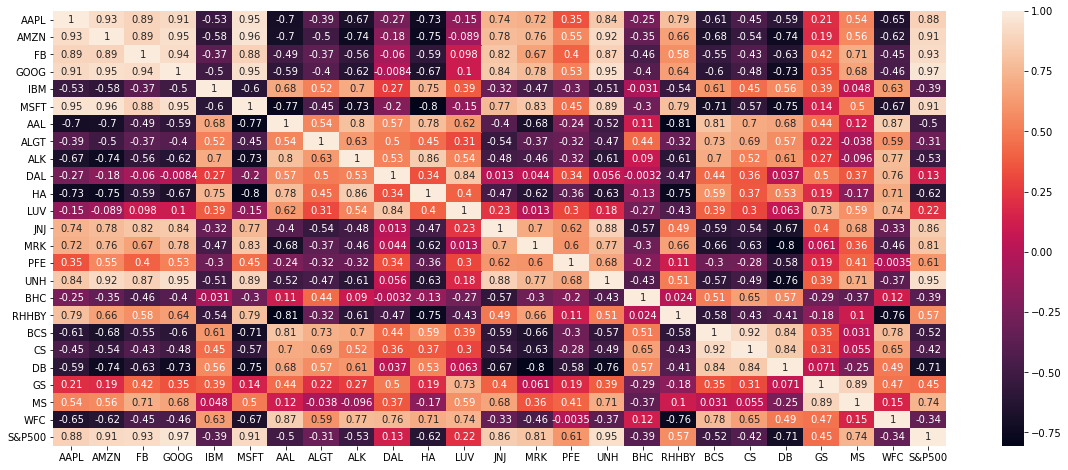

In [104]:
#Plotting the correlation of Stock Prices
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

**Observation:**

1. Strong Positive Correlation (0.6 to 1): AAPL, AMZN, GOOG, GS, JNJ, MRK, FB , MSFT, PFE, UNH, MS
2. Weak Positive Correlation (0 to 0.6): GS, RHHBY, .
3. Negative Correlation (0 to -1): BHC, CS, DB, WFC,AAL,ALGT,ALK,HA,BCS,IBM


Ideally, the stocks that have negative correlation with the Index (S&P 500) should be avoided in the portfolio since they may prove to be very risky.

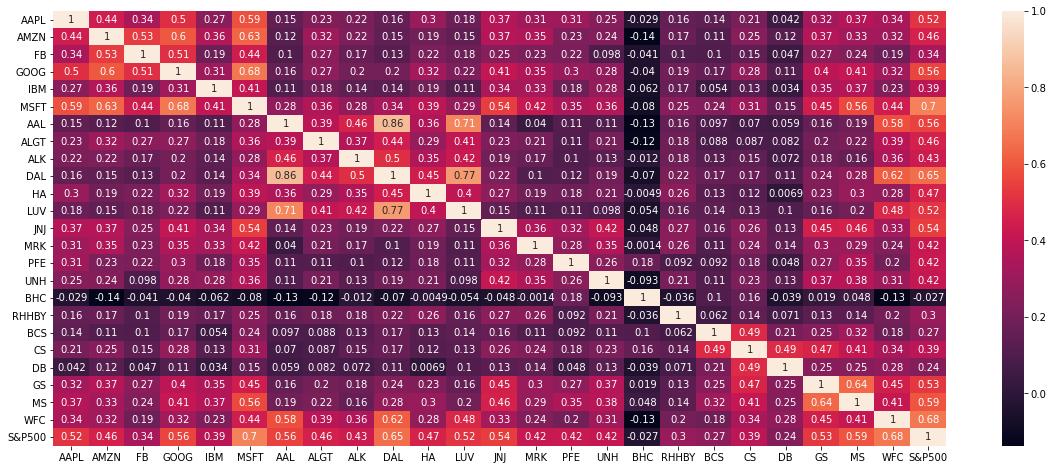

In [105]:
#Plotting the correlation of Stock Vol
plt.figure(figsize = (20,8))
sns.heatmap(df_V.corr(),annot = True)
plt.show()

**Obervation :**

1. S&P500 has a positve correlation with all the stock except with BHC

Correlation of more than 0.6 can be observed in the volumes of DAL, WFC, MS, and the highest is with MSFT - 0.71

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

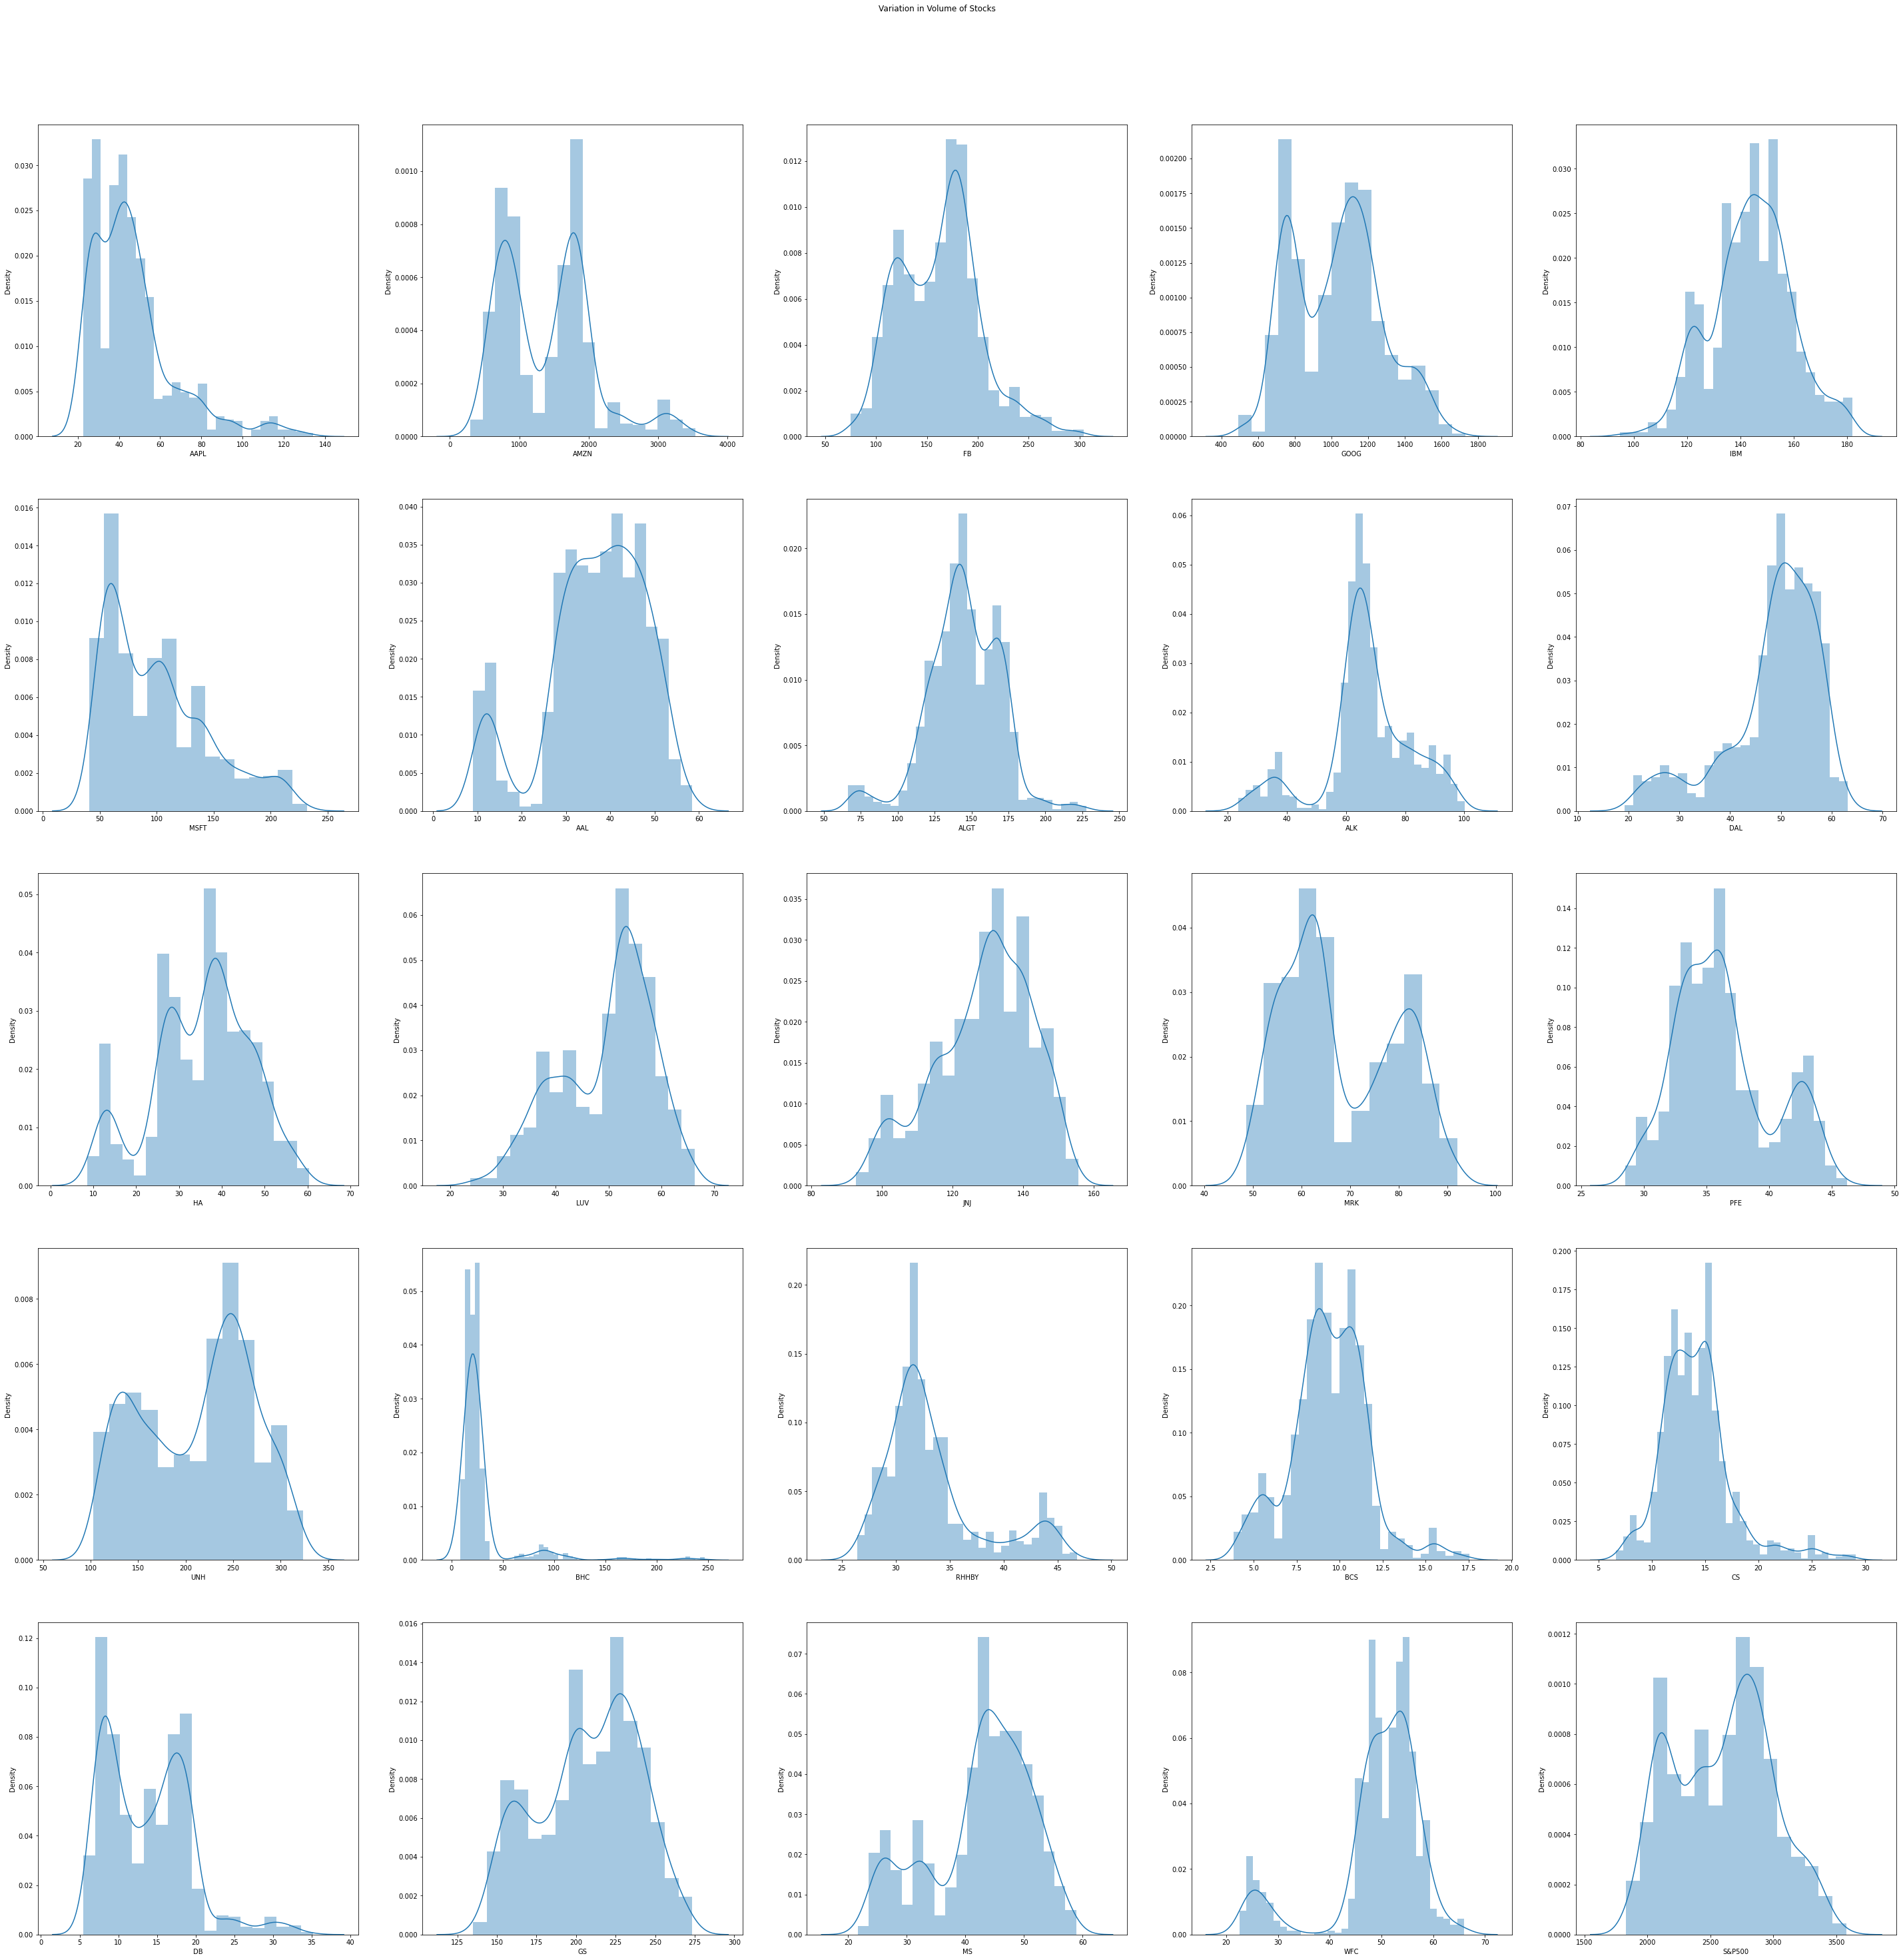

In [106]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (50,50))
plt.tight_layout()
feature = df.columns
for i in enumerate(feature):
    plt.subplot(5,5, i[0]+1)
    sns.distplot(df[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=0.93)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

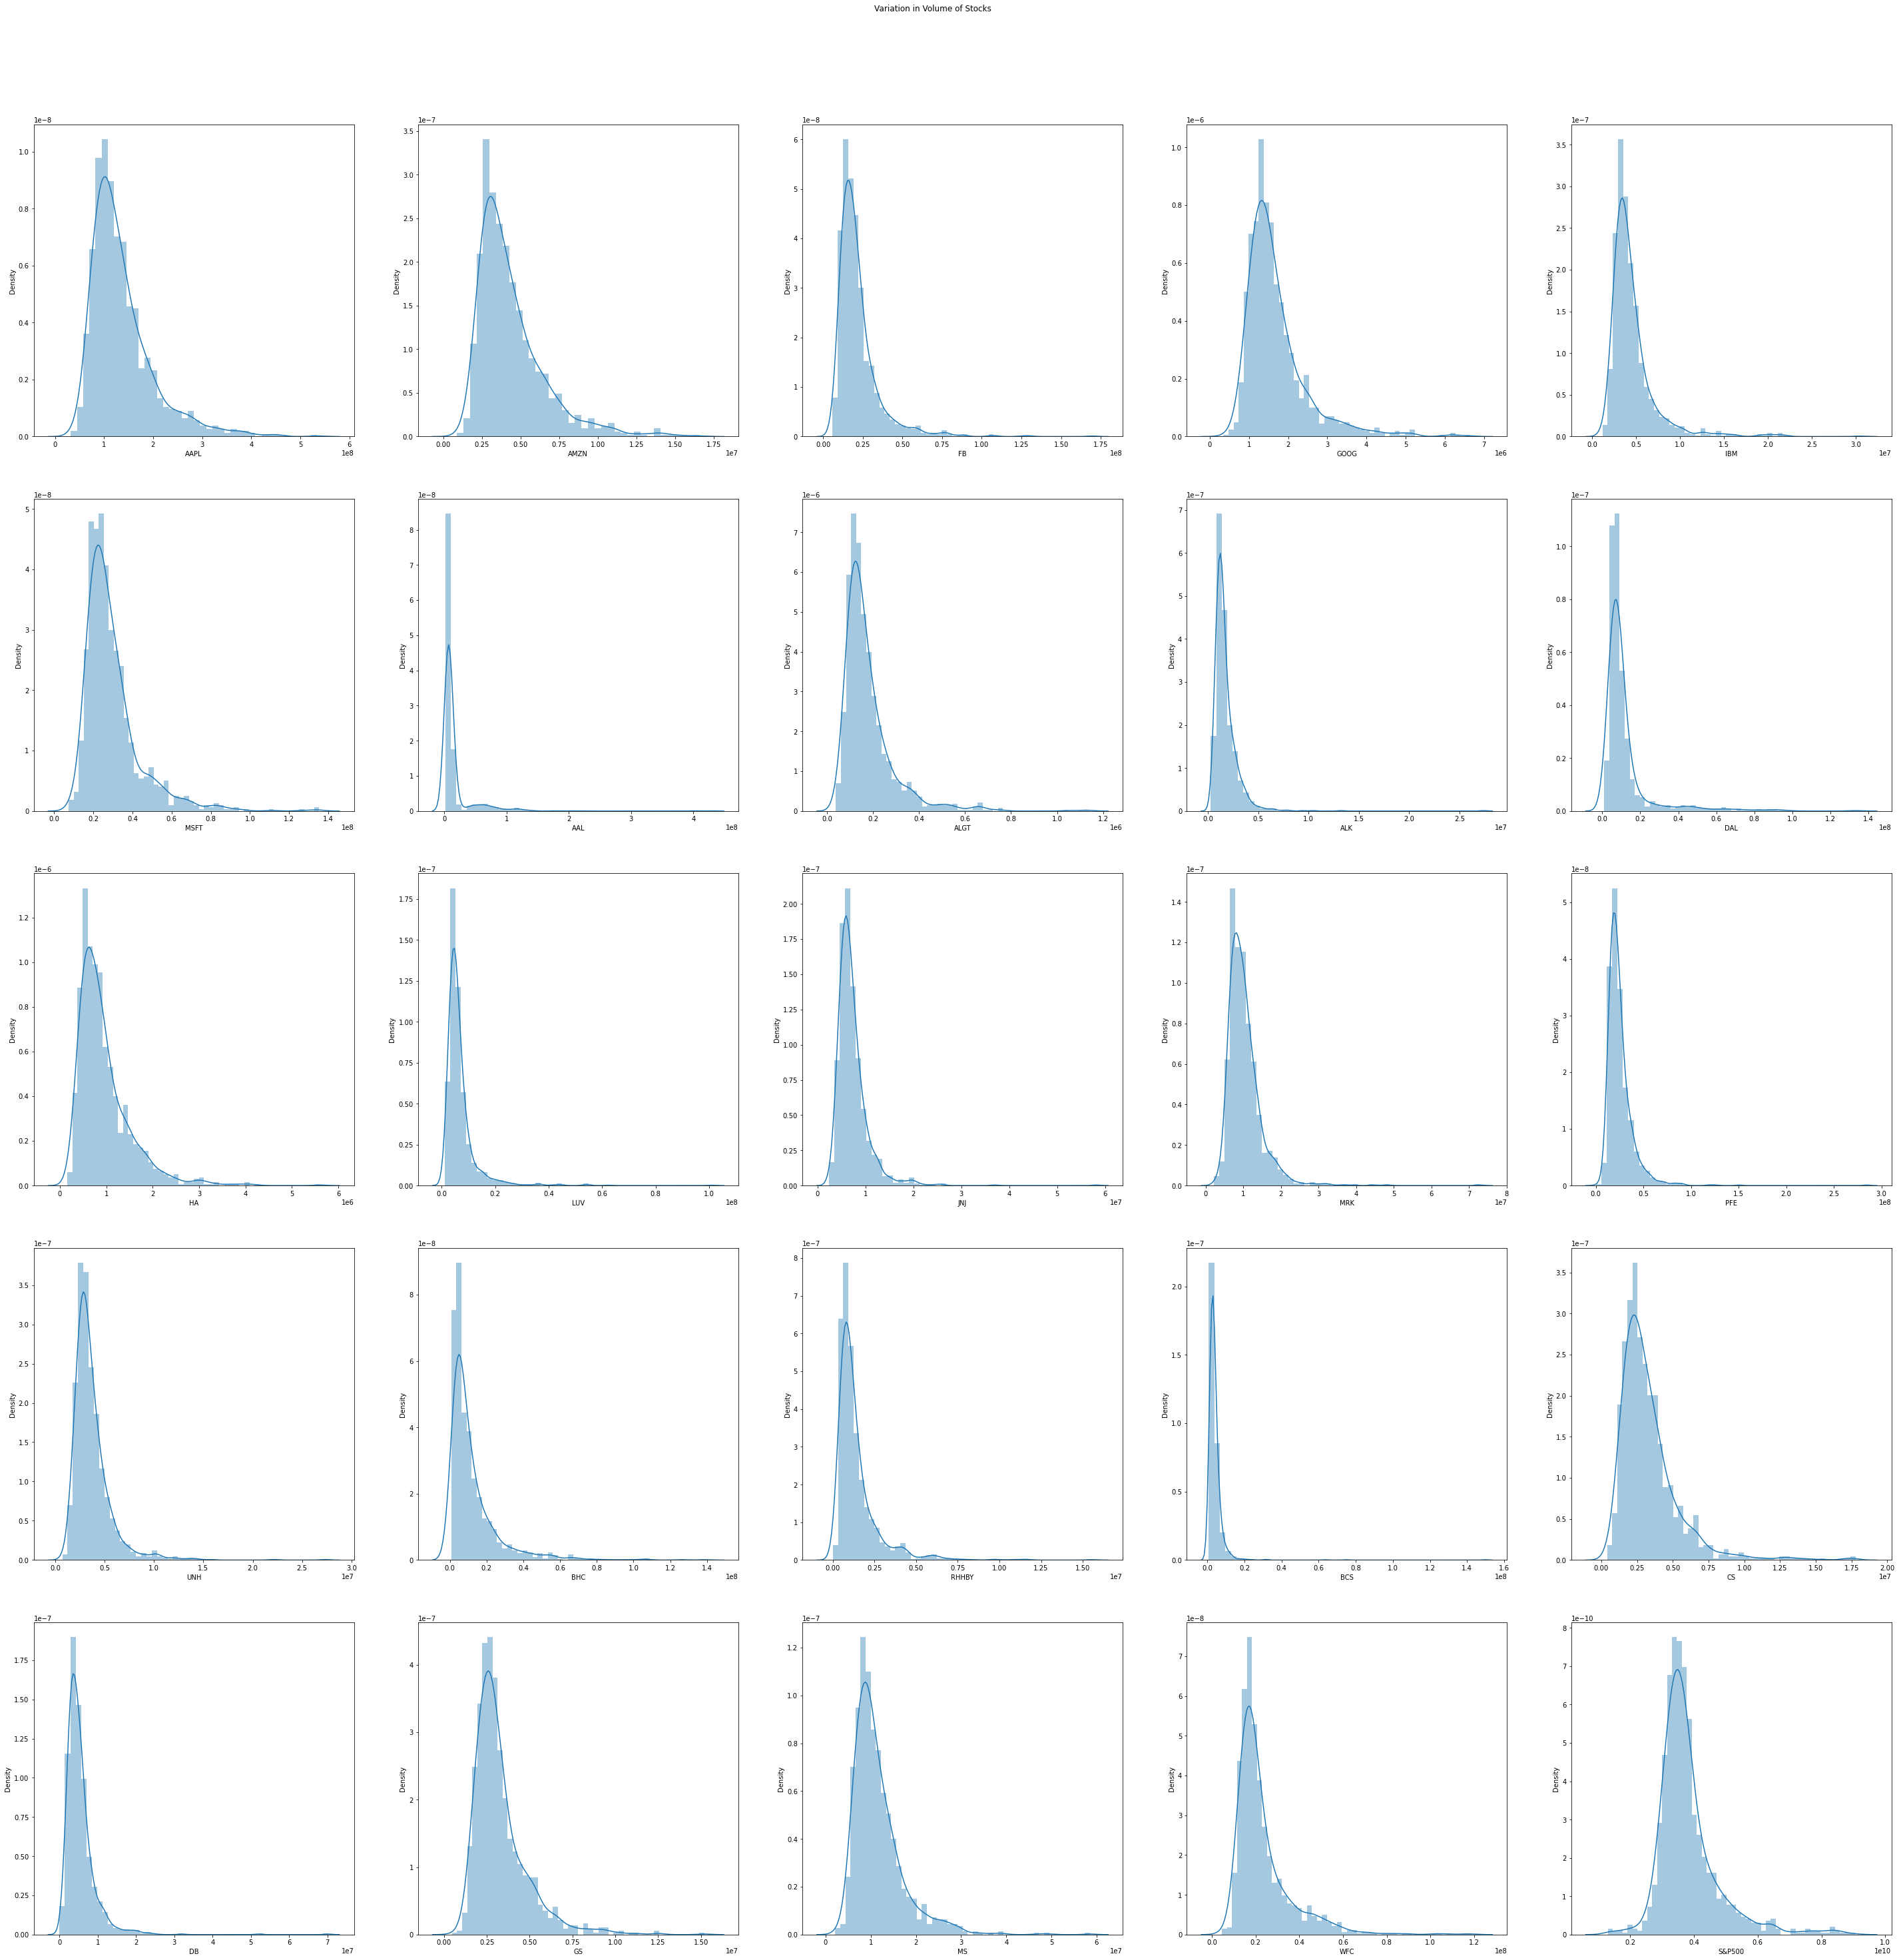

In [107]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (50,50))
plt.tight_layout()
feature = df_V.columns
for i in enumerate(feature):
    plt.subplot(5,5, i[0]+1)
    sns.distplot(df_V[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=0.93)
plt.show()

**Observation:**
    
Higher the standard deviation, more volatile is the stock. 
So, in the above figures a volatile stock will cover more area.

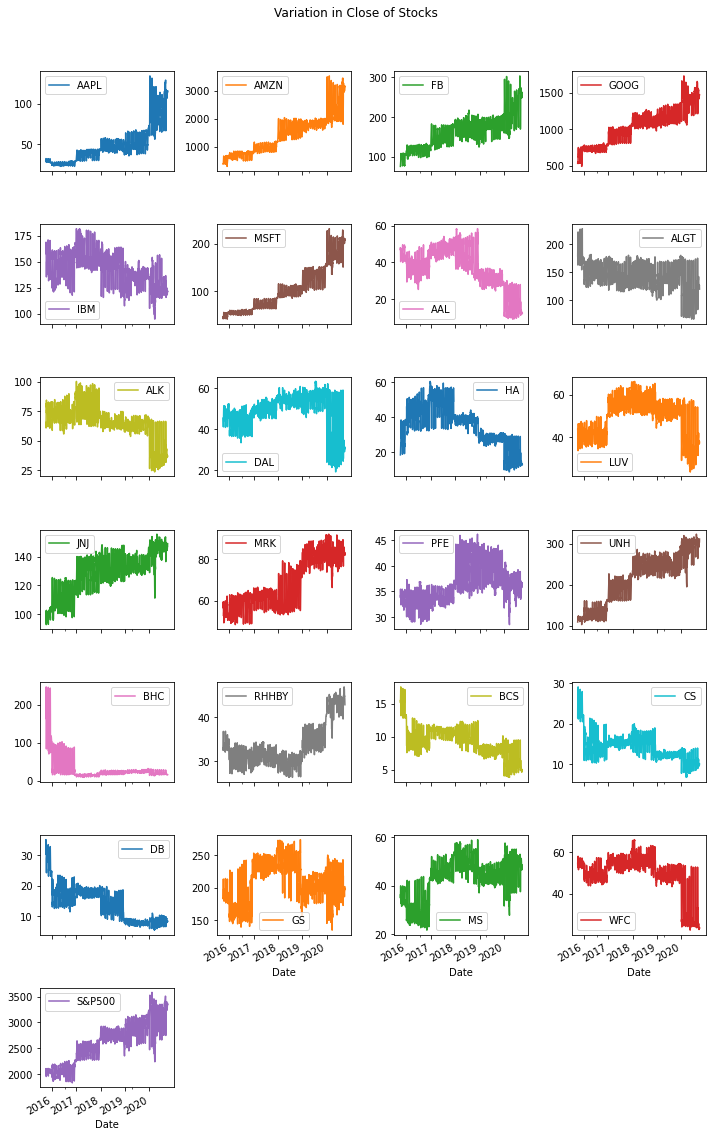

In [108]:
#Creating Sub-plots to visualize the stocks volume
df.plot(kind = 'line',subplots=True, layout = (7,4),figsize=(10,15))
plt.tight_layout()
plt.suptitle("Variation in Close of Stocks",y=1.05)
plt.show()

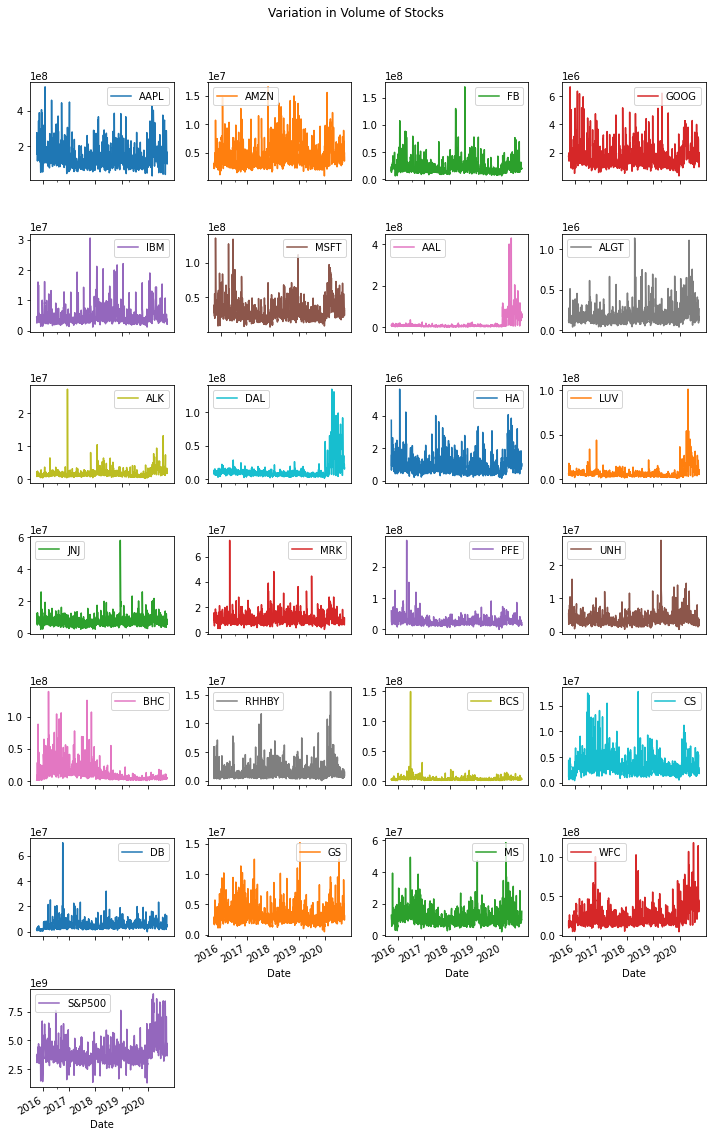

In [109]:
#Creating Sub-plots to visualize the stocks volume
df_V.plot(kind = 'line',subplots=True, layout = (7,4),figsize=(10,15))
plt.tight_layout()
plt.suptitle("Variation in Volume of Stocks",y=1.05)
plt.show()

**Observation:** For the lat year , if we chcek the volumes and stock price of each company
    
1. For most of Technology sector except IBM, the volumes have gone up and few other compnaies from other sector as well 

2. Trading volumes have gone down in ALK, BCS, DB, BHC, JNJ and PFE.

3. We should consider stocks that have a positive movement suggesting that the price has increased during the given period

4. Also, it suggests that the prices are expected to show an uptrend in the future.

5. The price of aviation and banking stocks has gone down. The highest drop in the prices can be observed in DB and BHC.

Like mentioned The volume and stock price movement in most technology stocks is observed in sync with S&P 500.

# EDA Obseravtion : W/o Normalization for each Sector 

Pharma Sector :

   1. Though in the past five year the we a lot of diffrence in terms of the stock price in BHC , after a time from the year 2018 , we see a steady phase in the stock market. 
   2. Where has RHHBY , we see a staedy phase in last 5 years.

Technology Sector:
    
   1. In the above plot we see AMZN is priced quite higher along side Google quite follows them on the same trend. 
   2. Stock Price , has gone has high has 3500 , in Technology wise 
    

Finance Sector :

   1. GS , tops the other companies , in Finance industry 
   2. Stock price has gone has high has 250 , in the latest Finance industry 

Aviation Sector :

1. Even though ALGT or other Aviation comapny have seen quite high on the earlier years , but we see a dip in the latest years here. 
2. compared to the compnaies on the Aviation idustry , the latest ALGT looks quite a study one . 
3. Stock price has gone has high has 200 in the aviation industry 

 Health care Sector :

   1. UNH is the top ,on stcok price market,its seen a quite increease in the last 5year of its market compared to any other companies in th same sector. 
   2. JNJ also seems a steady phase on the stock here
    

**NORMALIZATION**

We do see that the certain stocks are way high than any other stocks from each indiviaula companies. Its often the case that diffrenet stocks are priced at significanty differnet levels. 

As a result , its hard to cvompare these stocks objectively. To address this lets normalize the stcok price so that all start from a single point and move from there. 

To do so , we need to normalize the price of each stcok. i.e divide the value of each column by theire price on day one. 
This ensures that each stocks starts at 1.0.


In [110]:
# Replicating the original dataframe for this purpose
df_Normalized=df.copy()

# Checking the data
df_Normalized.head()

AAPL        AMZN         FB        GOOG         IBM  \
Date                                                                   
2015-10-02  30.504999  373.000000  75.190002  535.469849  158.559998   
2015-10-03  31.127501  369.510010  77.550003  553.490417  157.809998   
2015-10-04  31.775000  382.649994  82.040001  538.531433  162.860001   
2015-10-06  32.220001  430.769989  82.160004  536.690002  168.919998   
2015-10-07  30.820000  443.510010  87.949997  530.130005  166.949997   

                 MSFT        AAL        ALGT        ALK        DAL  ...  \
Date                                                                ...   
2015-10-02  42.599998  48.049999  179.050003  65.370003  45.320000  ...   
2015-10-03  42.029999  46.740002  191.759995  64.169998  43.419998  ...   
2015-10-04  41.720001  47.730000  168.220001  63.939999  43.230000  ...   
2015-10-06  46.610001  40.430000  162.839996  60.759998  41.060001  ...   
2015-10-07  44.610001  41.209999  194.350006  70.550003  42.459999  ...   

                   UNH         BHC      RHHBY    BCS         CS         DB  \
Date                                                                         
2015-10-02  108.970001  164.130005  32.970001  15.48  21.570000  30.410000   
2015-10-03  112.459999  201.479996  32.490002  15.31  25.110001  31.160000   
2015-10-04  119.000000  207.500000  35.520000  15.14  27.700001  35.160000   
2015-10-06  118.550003  229.119995  36.790001  16.68  27.670000  32.169998   
2015-10-07  122.150002  232.320007  36.540001  16.65  28.750000  31.910000   

                    GS         MS        WFC       S&P500  
Date                                                       
2015-10-02  184.559998  36.160000  54.570000  2068.590088  
2015-10-03  182.710007  34.880001  53.290001  2044.160034  
2015-10-04  195.639999  36.240002  54.320000  2102.060059  
2015-10-06  213.130005  39.889999  57.209999  2105.199951  
2015-10-07  207.190002  38.639999  56.080002  2076.620117  

[5 rows x 25 columns]

In [111]:
# Normalizing the Data 
for column in df.columns:
     df_Normalized[column] = df_Normalized[column]  / df_Normalized[column][0]
        
# Checking the dataframe after normalization
df_Normalized.head()

AAPL      AMZN        FB      GOOG       IBM      MSFT  \
Date                                                                     
2015-10-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-03  1.020407  0.990643  1.031387  1.033654  0.995270  0.986620   
2015-10-04  1.041633  1.025871  1.091103  1.005718  1.027119  0.979343   
2015-10-06  1.056220  1.154879  1.092699  1.002279  1.065338  1.094132   
2015-10-07  1.010326  1.189035  1.169703  0.990028  1.052914  1.047183   

                 AAL      ALGT       ALK       DAL  ...       UNH       BHC  \
Date                                                ...                       
2015-10-02  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
2015-10-03  0.972737  1.070986  0.981643  0.958076  ...  1.032027  1.227563   
2015-10-04  0.993340  0.939514  0.978124  0.953883  ...  1.092044  1.264242   
2015-10-06  0.841415  0.909467  0.929478  0.906002  ...  1.087914  1.395967   
2015-10-07  0.857648  1.085451  1.079241  0.936893  ...  1.120951  1.415463   

               RHHBY       BCS        CS        DB        GS        MS  \
Date                                                                     
2015-10-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-03  0.985441  0.989018  1.164117  1.024663  0.989976  0.964602   
2015-10-04  1.077343  0.978036  1.284191  1.156199  1.060035  1.002212   
2015-10-06  1.115863  1.077519  1.282800  1.057876  1.154801  1.103153   
2015-10-07  1.108280  1.075581  1.332870  1.049326  1.122616  1.068584   

                 WFC    S&P500  
Date                            
2015-10-02  1.000000  1.000000  
2015-10-03  0.976544  0.988190  
2015-10-04  0.995419  1.016180  
2015-10-06  1.048378  1.017698  
2015-10-07  1.027671  1.003882  

[5 rows x 25 columns]

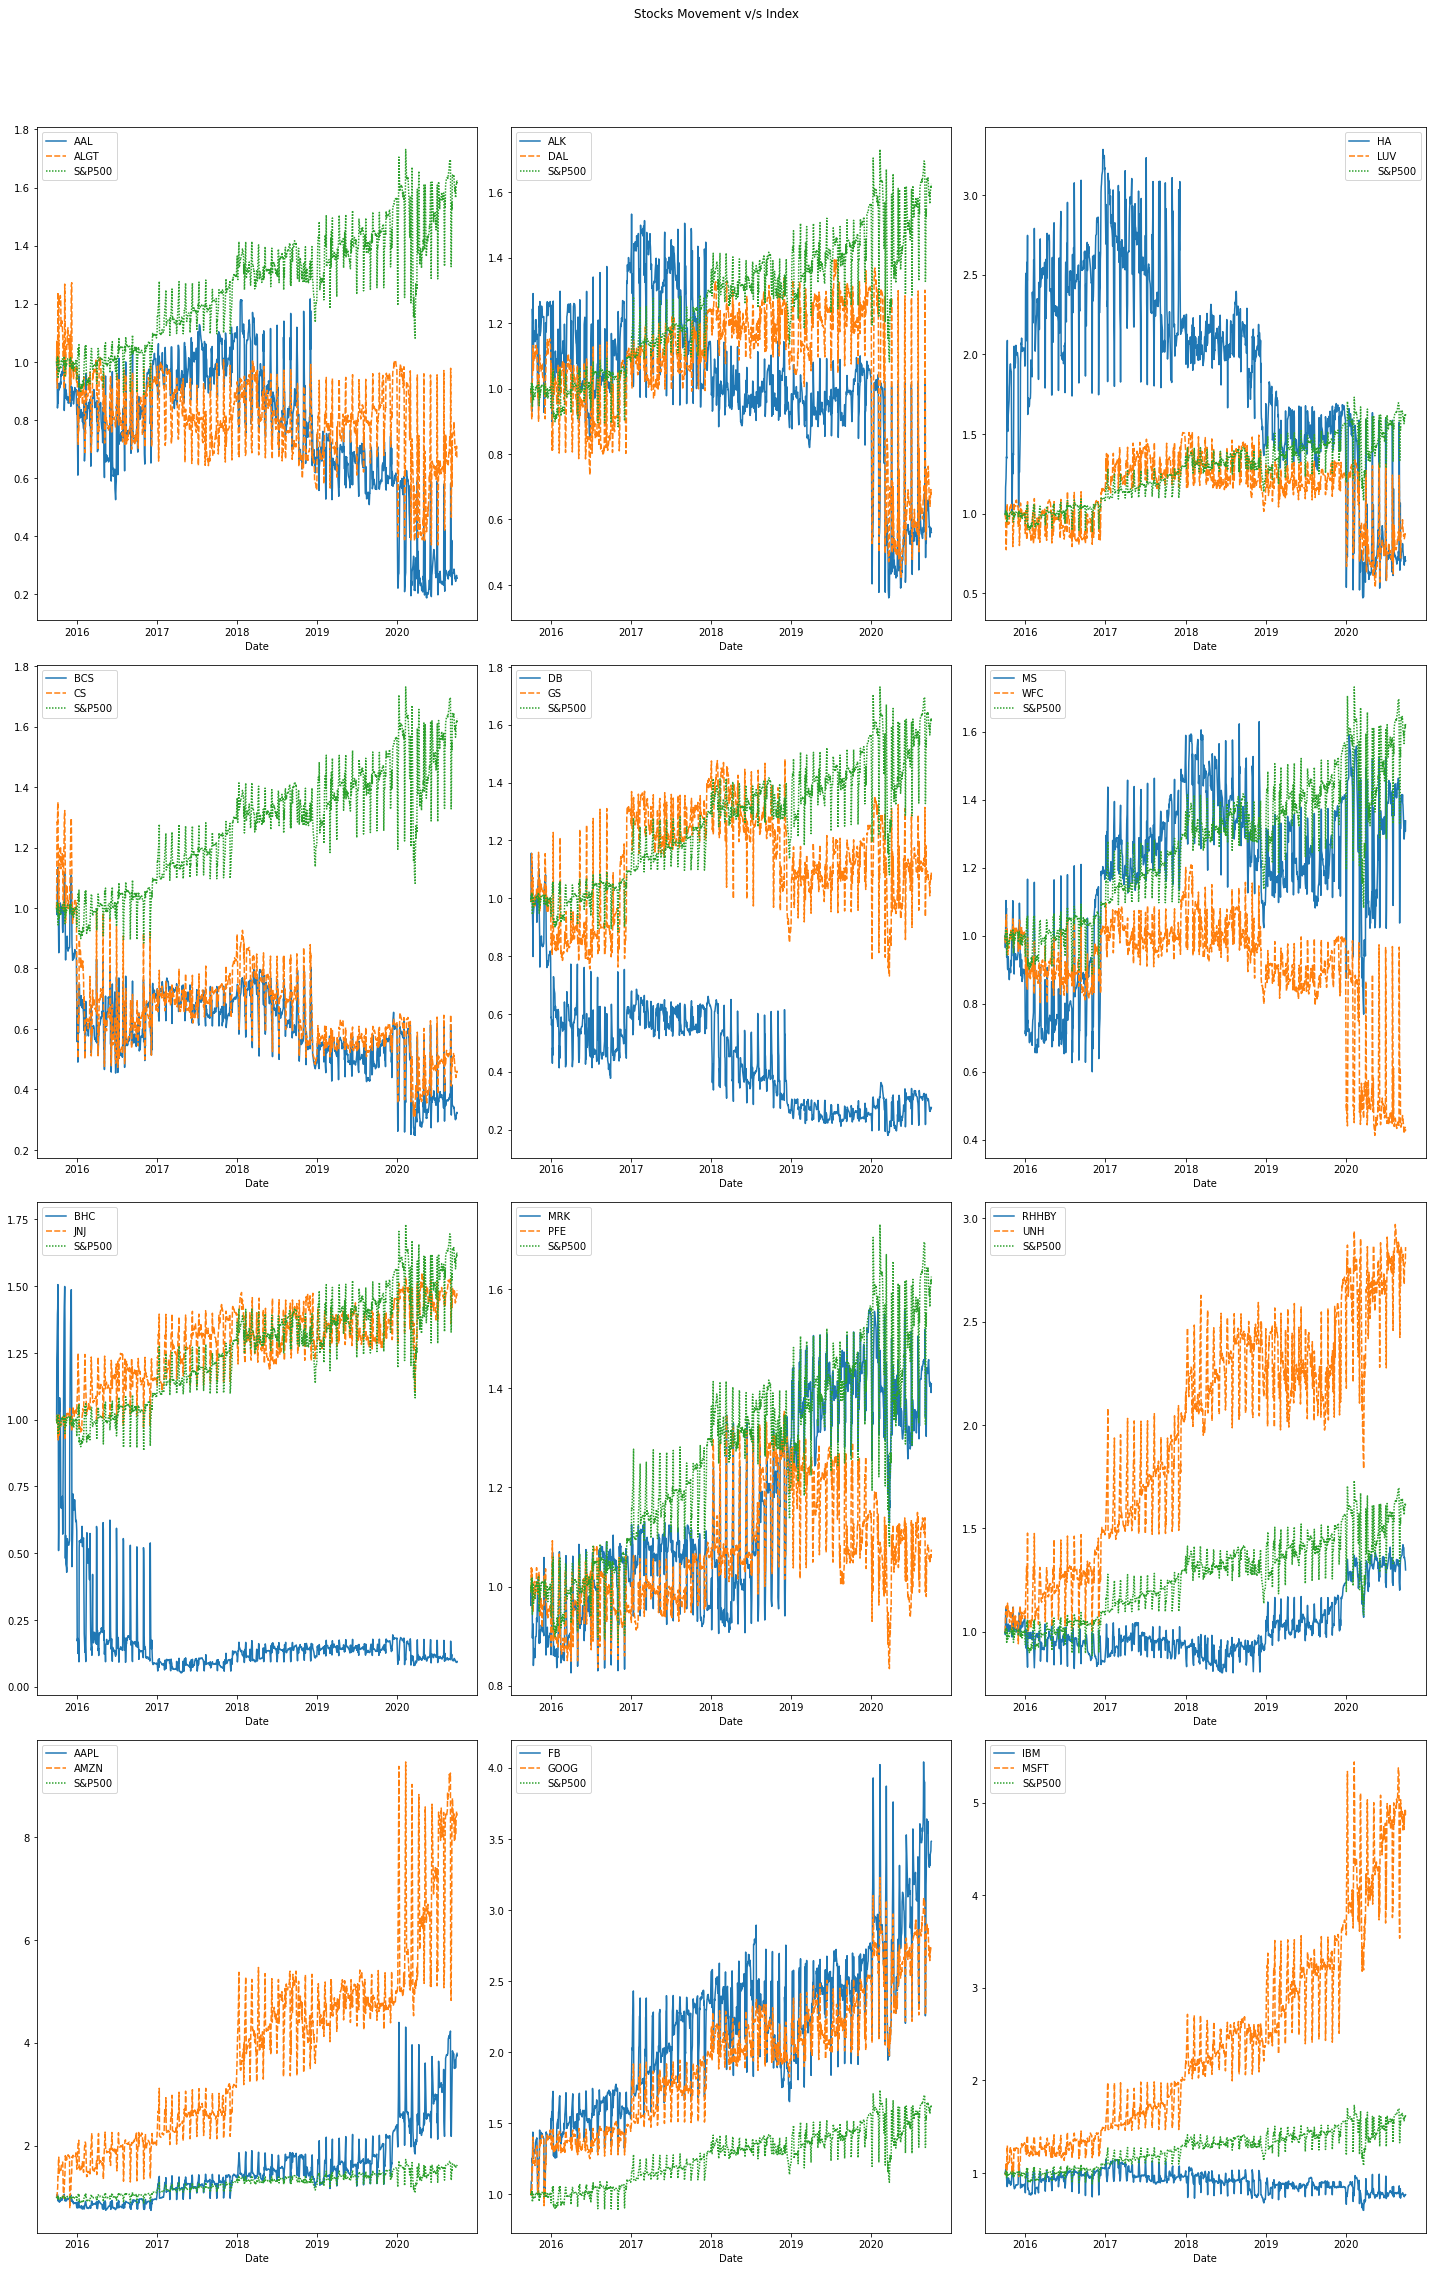

In [112]:
# Plotting Normalized Stock Prices against Index

plt.figure(figsize=(20,30))

plt.subplot(4,3,1)
sns.lineplot(data = df_Normalized[['AAL','ALGT','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,2)
sns.lineplot(data = df_Normalized[['ALK','DAL','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,3)
sns.lineplot(data = df_Normalized[['HA','LUV','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,4)
sns.lineplot(data = df_Normalized[['BCS','CS','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,5)
sns.lineplot(data = df_Normalized[['DB','GS','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,6)
sns.lineplot(data = df_Normalized[['MS','WFC','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,7)
sns.lineplot(data = df_Normalized[['BHC','JNJ','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,8)
sns.lineplot(data = df_Normalized[['MRK','PFE','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,9)
sns.lineplot(data = df_Normalized[['RHHBY','UNH','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,10)
sns.lineplot(data = df_Normalized[['AAPL','AMZN','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,11)
sns.lineplot(data = df_Normalized[['FB','GOOG','S&P500']])
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(4,3,12)
sns.lineplot(data = df_Normalized[['IBM','MSFT','S&P500']])
plt.legend(loc='best')
plt.tight_layout()


plt.suptitle("Stocks Movement v/s Index",y=1.05)
plt.show()

**Iniial Observation:**

1. In Tech sector wise; MSFT, GOOG, FB, AAPL, AMZN are showing an uptrend, whereas IBM is showing a downtrend.
2. In healthcare sector wise,  BHC and PFE are showing a downtrend
3. In Finance sector wise ;  DB, BCS, CS and WFC are showing a downtrend
4. In avaiation sectorwise; HA, DAL, AAL are showing a downtrend.

# Detailed Obseravtion : W/ Normalization for each Sector

Technolgy Sector :

 1. We still see Amazon leading the plot , and growing upward each year by year .
 2. this is followed by other companies we have cocmpred with  , but latest being Microsoft leading just below Amazon , followed by Apple , FB and Google.
 3. IBM still shows the steady trend from the last 5 years.
    

Aviation Sector : 

1. We see HA started with a quite good upward trend , but in the last year we see a downward trend 
2. which makes most of all teh aviation sector company we are looking at . 

3. the year 2020 hav seen a dip in all most all teh Aviatiooon sector compnay , due to Covid-19 hit. 

4. we see a slow raise after that in all the companies here. 

Finance Sector: 

1. This plot gives us a diffrent trend all together 

2. To start with , we see CS took well in the inital days , but in the last 5 years, we see the rend being Downward

3. Were as MS has seen down in the inioatl days , but it is doing good and have stayed quite on top compared to other companies.

4. MS is followed by GS

Pharma sector : 
    
1. RHHBY have stayed steady over the year and have been doing good , inspite of the Covid hit. 


 Heath Care Sector: 
 
 1. UNH have been on the upwasrd trend since last 5 years 
 2. followed by JNJ and MRK , we see quite a close to bith ups and down here. 
    

# Basic Financial Analysis 

**1. Relative Strength Analysis**

This is done to know , how market is doing on that particular day campred to S&P500 

i.e Stock price of that Compnay on the given day divided by S&P 500 value on the given Day

In [113]:
df_RAS = df.copy()

for column in df.columns:
     df_RAS[column] = df_RAS [column]/df['S&P500']

#df_RAS.head()

Text(0.5, 1.05, 'Relative Stock Prices wrt Market Index')

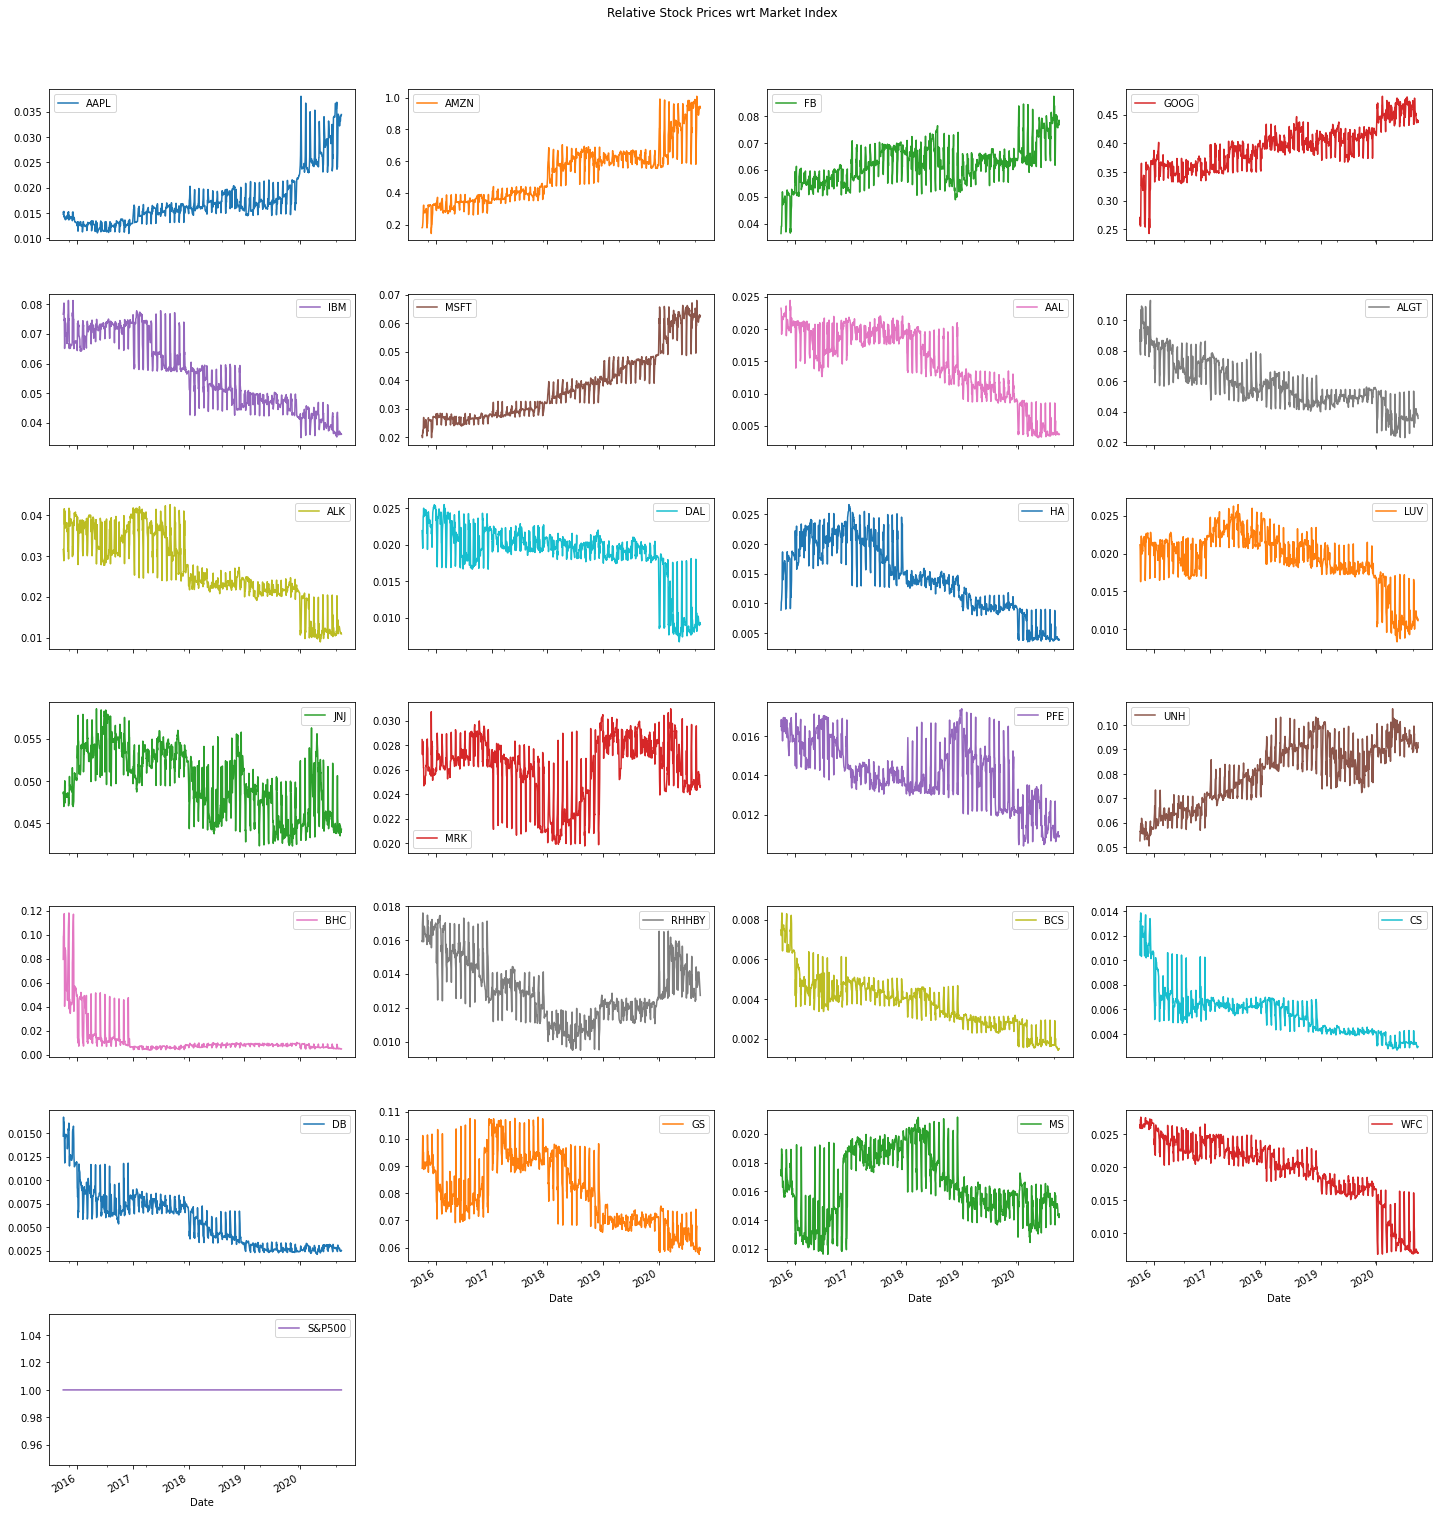

In [114]:
#plot the graph for Relative stgrength Analysis

df_RAS.plot(kind = 'line',subplots=True, layout = (7,4),figsize=(20,20))
plt.tight_layout()
plt.suptitle("Relative Stock Prices wrt Market Index",y=1.05)

**Obervation based on the entrire data**

1. Amazon , shows the highest return of all time compared to other various indudtsry followed by Google , Apple , msft, fb 

from these we see , Returns are high in tecghnology sector , has we see the first two visalzaition shows Amazon , Google 

2. followed by UNH , from Health care sector 

**2. Daily Returns**

Chcek for the changes on stoack price on daily basis

In [115]:
df_Daily_return = df.pct_change()

df_Daily_return = round((df_Daily_return[1:]*100),2)

df_Daily_return.head()

AAPL   AMZN    FB   GOOG   IBM   MSFT    AAL   ALGT    ALK   DAL  \
Date                                                                           
2015-10-03  2.04  -0.94  3.14   3.37 -0.47  -1.34  -2.73   7.10  -1.84 -4.19   
2015-10-04  2.08   3.56  5.79  -2.70  3.20  -0.74   2.12 -12.28  -0.36 -0.44   
2015-10-06  1.40  12.58  0.15  -0.34  3.72  11.72 -15.29  -3.20  -4.97 -5.02   
2015-10-07 -4.35   2.96  7.05  -1.22 -1.17  -4.29   1.93  19.35  16.11  3.41   
2015-10-08 -2.89  18.15  7.05  19.54 -6.11   6.10   1.14  14.22  11.45  9.09   

            ...   UNH    BHC  RHHBY    BCS     CS     DB    GS     MS   WFC  \
Date        ...                                                               
2015-10-03  ...  3.20  22.76  -1.46  -1.10  16.41   2.47 -1.00  -3.54 -2.35   
2015-10-04  ...  5.82   2.99   9.33  -1.11  10.31  12.84  7.08   3.90  1.93   
2015-10-06  ... -0.38  10.42   3.58  10.17  -0.11  -8.50  8.94  10.07  5.32   
2015-10-07  ...  3.04   1.40  -0.68  -0.18   3.90  -0.81 -2.79  -3.13 -1.98   
2015-10-08  ...  0.27   6.38  -2.19   5.47   1.32   6.68 -0.59   1.14  3.32   

            S&P500  
Date                
2015-10-03   -1.18  
2015-10-04    2.83  
2015-10-06    0.15  
2015-10-07   -1.36  
2015-10-08    1.33  

[5 rows x 25 columns]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

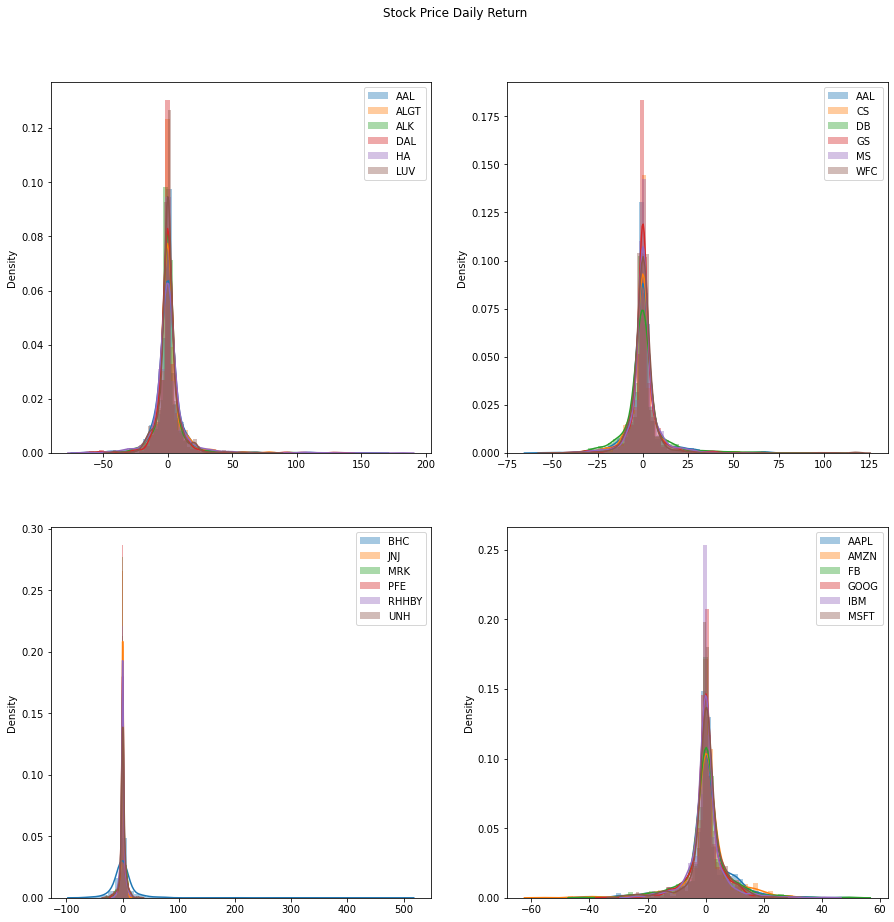

In [116]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(df_Daily_return[['AAL']],hist=True,label="AAL")
sns.distplot(df_Daily_return[['ALGT']],hist=True,label="ALGT")
sns.distplot(df_Daily_return[['ALK']],hist=True,label="ALK")
sns.distplot(df_Daily_return[['DAL']],hist=True,label="DAL")
sns.distplot(df_Daily_return[['HA']],hist=True,label="HA")
sns.distplot(df_Daily_return[['LUV']],hist=True,label="LUV")
plt.legend()

plt.subplot(2,2,2)
sns.distplot(df_Daily_return[['BCS']],hist=True,label="AAL")
sns.distplot(df_Daily_return[['CS']],hist=True,label="CS")
sns.distplot(df_Daily_return[['DB']],hist=True,label="DB")
sns.distplot(df_Daily_return[['GS']],hist=True,label="GS")
sns.distplot(df_Daily_return[['MS']],hist=True,label="MS")
sns.distplot(df_Daily_return[['WFC']],hist=True,label="WFC")
plt.legend()

plt.subplot(2,2,3)
sns.distplot(df_Daily_return[['BHC']],hist=True,label="BHC")
sns.distplot(df_Daily_return[['JNJ']],hist=True,label="JNJ")
sns.distplot(df_Daily_return[['MRK']],hist=True,label="MRK")
sns.distplot(df_Daily_return[['PFE']],hist=True,label="PFE")
sns.distplot(df_Daily_return[['RHHBY']],hist=True,label="RHHBY")
sns.distplot(df_Daily_return[['UNH']],hist=True,label="UNH")
plt.legend()

plt.subplot(2,2,4)
sns.distplot(df_Daily_return[['AAPL']],hist=True,label="AAPL")
sns.distplot(df_Daily_return[['AMZN']],hist=True,label="AMZN")
sns.distplot(df_Daily_return[['FB']],hist=True,label="FB")
sns.distplot(df_Daily_return[['GOOG']],hist=True,label="GOOG")
sns.distplot(df_Daily_return[['IBM']],hist=True,label="IBM")
sns.distplot(df_Daily_return[['MSFT']],hist=True,label="MSFT")
plt.legend()

plt.suptitle("Stock Price Daily Return",y=0.95)
plt.show()

**OBESERVATION :** 

1. Google has a very high daily return and based on the all copnay wise , as well MSFT seems quite hand in hand and a major times we have seen a good and low daily returns. 

**3. Montly returns**

In [117]:
df_Montly_return = df.pct_change(21)


df_Montly_return.head()

AAPL  AMZN  FB  GOOG  IBM  MSFT  AAL  ALGT  ALK  DAL  ...  UNH  \
Date                                                              ...        
2015-10-02   NaN   NaN NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  ...  NaN   
2015-10-03   NaN   NaN NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  ...  NaN   
2015-10-04   NaN   NaN NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  ...  NaN   
2015-10-06   NaN   NaN NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  ...  NaN   
2015-10-07   NaN   NaN NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  ...  NaN   

            BHC  RHHBY  BCS  CS  DB  GS  MS  WFC  S&P500  
Date                                                      
2015-10-02  NaN    NaN  NaN NaN NaN NaN NaN  NaN     NaN  
2015-10-03  NaN    NaN  NaN NaN NaN NaN NaN  NaN     NaN  
2015-10-04  NaN    NaN  NaN NaN NaN NaN NaN  NaN     NaN  
2015-10-06  NaN    NaN  NaN NaN NaN NaN NaN  NaN     NaN  
2015-10-07  NaN    NaN  NaN NaN NaN NaN NaN  NaN     NaN  

[5 rows x 25 columns]

In [118]:
df_Montly_return.isna().sum()

AAPL      21
AMZN      21
FB        21
GOOG      21
IBM       21
MSFT      21
AAL       21
ALGT      21
ALK       21
DAL       21
HA        21
LUV       21
JNJ       21
MRK       21
PFE       21
UNH       21
BHC       21
RHHBY     21
BCS       21
CS        21
DB        21
GS        21
MS        21
WFC       21
S&P500    21
dtype: int64

In [119]:
df_Montly_return = df_Montly_return.dropna()

In [120]:
#df_Montly_return.isna().sum()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

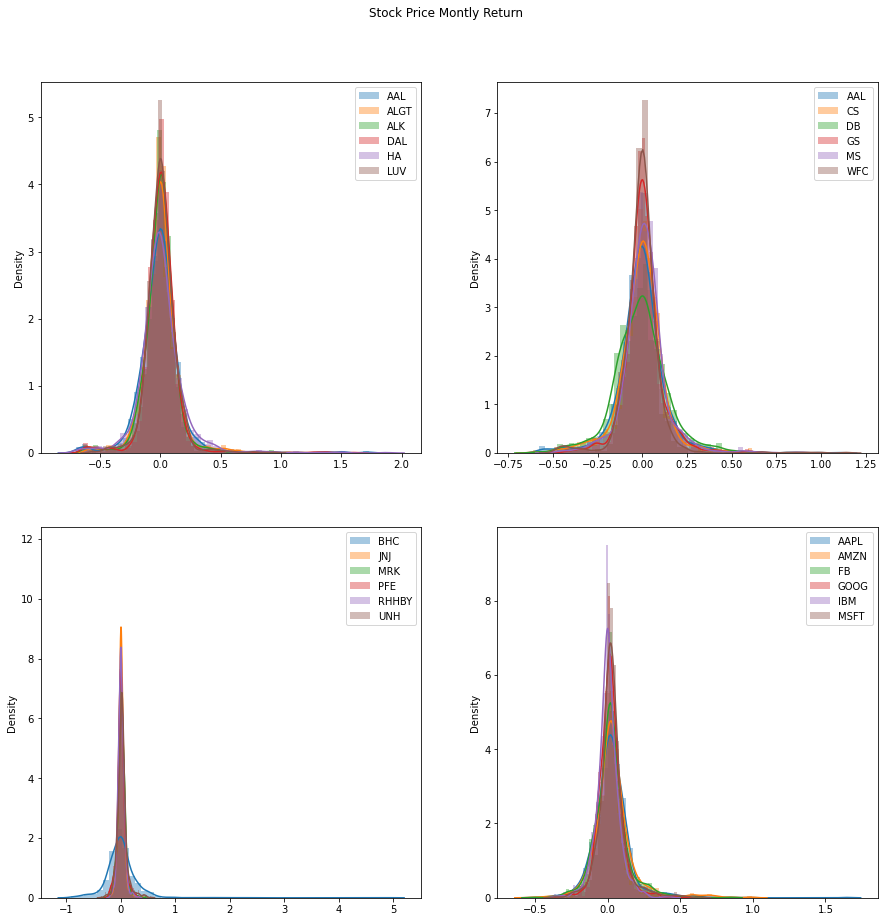

In [121]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(df_Montly_return[['AAL']],hist=True,label="AAL")
sns.distplot(df_Montly_return[['ALGT']],hist=True,label="ALGT")
sns.distplot(df_Montly_return[['ALK']],hist=True,label="ALK")
sns.distplot(df_Montly_return[['DAL']],hist=True,label="DAL")
sns.distplot(df_Montly_return[['HA']],hist=True,label="HA")
sns.distplot(df_Montly_return[['LUV']],hist=True,label="LUV")
plt.legend()

plt.subplot(2,2,2)
sns.distplot(df_Montly_return[['BCS']],hist=True,label="AAL")
sns.distplot(df_Montly_return[['CS']],hist=True,label="CS")
sns.distplot(df_Montly_return[['DB']],hist=True,label="DB")
sns.distplot(df_Montly_return[['GS']],hist=True,label="GS")
sns.distplot(df_Montly_return[['MS']],hist=True,label="MS")
sns.distplot(df_Montly_return[['WFC']],hist=True,label="WFC")
plt.legend()

plt.subplot(2,2,3)
sns.distplot(df_Montly_return[['BHC']],hist=True,label="BHC")
sns.distplot(df_Montly_return[['JNJ']],hist=True,label="JNJ")
sns.distplot(df_Montly_return[['MRK']],hist=True,label="MRK")
sns.distplot(df_Montly_return[['PFE']],hist=True,label="PFE")
sns.distplot(df_Montly_return[['RHHBY']],hist=True,label="RHHBY")
sns.distplot(df_Montly_return[['UNH']],hist=True,label="UNH")
plt.legend()

plt.subplot(2,2,4)
sns.distplot(df_Montly_return[['AAPL']],hist=True,label="AAPL")
sns.distplot(df_Montly_return[['AMZN']],hist=True,label="AMZN")
sns.distplot(df_Montly_return[['FB']],hist=True,label="FB")
sns.distplot(df_Montly_return[['GOOG']],hist=True,label="GOOG")
sns.distplot(df_Montly_return[['IBM']],hist=True,label="IBM")
sns.distplot(df_Montly_return[['MSFT']],hist=True,label="MSFT")
plt.legend()

plt.suptitle("Stock Price Montly Return",y=0.95)
plt.show()

**Observation**

Montly returns as well shows , Google has staedy 5 year montly returns and just last year , we see a good raise in monthly wise retuns for google. 

Has far has returns are considered , we need to definietly stick on with Google stocks 

# Descriptive Analysis 

In [122]:
DA = df.describe()

In [123]:
#DA

In [124]:
# rename the Mean to Avg. Daily Returns 

DA = DA.rename(index={'mean': 'Avg Daily Returns'})



In [125]:
DA = DA.rename(index={'std': 'Risk'})

In [126]:
#DA

In [127]:
DA = DA.drop(['count','25%','50%','75%'])

DA

AAPL         AMZN          FB         GOOG  \
Avg Daily Returns   46.516456  1409.100396  162.514306  1033.223841   
Risk                20.430795   661.127442   39.952564   241.908554   
min                 22.584999   291.410004   75.190002   491.201416   
max                134.179993  3531.449951  303.910004  1728.280029   

                          IBM        MSFT        AAL        ALGT         ALK  \
Avg Daily Returns  144.154992  100.890290  36.696331  144.843807   66.979532   
Risk                15.209303   44.998176  11.330723   24.533383   15.087841   
min                 94.769997   41.020000   9.040000   66.230003   23.559999   
max                181.949997  231.649994  58.470001  227.860001  100.239998   

                         DAL  ...         UNH         BHC      RHHBY  \
Avg Daily Returns  48.322597  ...  212.016774   29.300065  33.392798   
Risk                9.233514  ...   59.005180   31.559356   4.565299   
min                19.190001  ...  102.550003    8.510000  26.389999   
max                63.160000  ...  323.700012  247.149994  46.840000   

                         BCS         CS         DB          GS         MS  \
Avg Daily Returns   9.376871  14.207435  13.723419  207.662782  42.648339   
Risk                2.225888   3.341786   5.522550   31.634104   8.620468   
min                 3.840000   6.670000   5.480000  134.970001  21.690001   
max                17.559999  29.129999  35.160000  273.380005  58.910000   

                         WFC       S&P500  
Avg Daily Returns  49.301823  2601.525870  
Risk                8.929733   390.601813  
min                22.530001  1829.079956  
max                65.930000  3580.840088  

[4 rows x 25 columns]

**Now that we have the required data to understand the stcok data, here we are doing DEscriptive analysis to understand, the overall situation of data and the relationship between data.**

In [128]:
df.mean() # this is nothing but what we have taken a data frame has above named 'DA'

AAPL        46.516456
AMZN      1409.100396
FB         162.514306
GOOG      1033.223841
IBM        144.154992
MSFT       100.890290
AAL         36.696331
ALGT       144.843807
ALK         66.979532
DAL         48.322597
HA          35.372863
LUV         49.596613
JNJ        128.841798
MRK         67.927081
PFE         36.310677
UNH        212.016774
BHC         29.300065
RHHBY       33.392798
BCS          9.376871
CS          14.207435
DB          13.723419
GS         207.662782
MS          42.648339
WFC         49.301823
S&P500    2601.525870
dtype: float64



**Annualized Returns**

In [129]:
Annualized_Returns = []
col=[]

for i in df_Daily_return.columns:
    col.append(i)

for i in df_Daily_return.columns:
    Annualized_Returns.append(df_Daily_return[i].mean()*252)

In [130]:
# Creating a dataframe and stocks values for each stock
Annualized_df=pd.DataFrame(list(zip(col,Annualized_Returns)),columns =['Stocks', 'Annualized Returns'])

In [131]:
Annualized_df

Stocks  Annualized Returns
0     AAPL          129.260339
1     AMZN          147.654915
2       FB          109.779661
3     GOOG           60.545085
4      IBM           41.135593
5     MSFT           83.991864
6      AAL          213.966102
7     ALGT          167.644068
8      ALK          153.988475
9      DAL          157.531525
10      HA          249.835932
11     LUV          101.829153
12     JNJ           27.563390
13     MRK           38.336949
14     PFE           28.682034
15     UNH           67.549831
16     BHC          789.506441
17   RHHBY           25.403390
18     BCS          123.585763
19      CS          102.244068
20      DB          138.109831
21      GS           72.248136
22      MS           90.734237
23     WFC           86.629831
24  S&P500           30.050847

In [132]:
DA

AAPL         AMZN          FB         GOOG  \
Avg Daily Returns   46.516456  1409.100396  162.514306  1033.223841   
Risk                20.430795   661.127442   39.952564   241.908554   
min                 22.584999   291.410004   75.190002   491.201416   
max                134.179993  3531.449951  303.910004  1728.280029   

                          IBM        MSFT        AAL        ALGT         ALK  \
Avg Daily Returns  144.154992  100.890290  36.696331  144.843807   66.979532   
Risk                15.209303   44.998176  11.330723   24.533383   15.087841   
min                 94.769997   41.020000   9.040000   66.230003   23.559999   
max                181.949997  231.649994  58.470001  227.860001  100.239998   

                         DAL  ...         UNH         BHC      RHHBY  \
Avg Daily Returns  48.322597  ...  212.016774   29.300065  33.392798   
Risk                9.233514  ...   59.005180   31.559356   4.565299   
min                19.190001  ...  102.550003    8.510000  26.389999   
max                63.160000  ...  323.700012  247.149994  46.840000   

                         BCS         CS         DB          GS         MS  \
Avg Daily Returns   9.376871  14.207435  13.723419  207.662782  42.648339   
Risk                2.225888   3.341786   5.522550   31.634104   8.620468   
min                 3.840000   6.670000   5.480000  134.970001  21.690001   
max                17.559999  29.129999  35.160000  273.380005  58.910000   

                         WFC       S&P500  
Avg Daily Returns  49.301823  2601.525870  
Risk                8.929733   390.601813  
min                22.530001  1829.079956  
max                65.930000  3580.840088  

[4 rows x 25 columns]

**Observation:**

1. All tech stocks have given highest returns except IBM. 
   The highest returns have been given by AMZN followed by MSFT followed by GOOG.
   
2. Highest negative return was in health care is BHC 
3. In healthcare, UNH has given highest positive return 
4. In Finance, barring GS and MS, all stocks have given negative returns.

5. The lowest positive returns have been observed in Aviation industry - HA at , followed by DAL.

**Annualized Risk**

In [133]:
#Calculating Annualized_Risk
Annualized_Risk = []

for i in df_Daily_return.columns:
    Annualized_Risk.append(df_Daily_return[i].std()*np.sqrt(252))
    

In [134]:
# Adding Annualized Risk column to the dataframe
Annualized_df['Annualized Risk']= Annualized_Risk

In [135]:
Annualized_df

Stocks  Annualized Returns  Annualized Risk
0     AAPL          129.260339       138.723042
1     AMZN          147.654915       137.425113
2       FB          109.779661       129.258250
3     GOOG           60.545085        88.736532
4      IBM           41.135593        97.431111
5     MSFT           83.991864        98.463102
6      AAL          213.966102       244.932183
7     ALGT          167.644068       196.444555
8      ALK          153.988475       192.105980
9      DAL          157.531525       195.794160
10      HA          249.835932       247.492785
11     LUV          101.829153       149.155827
12     JNJ           27.563390        61.906232
13     MRK           38.336949        77.689182
14     PFE           28.682034        73.246495
15     UNH           67.549831        94.361864
16     BHC          789.506441       596.748127
17   RHHBY           25.403390        63.598206
18     BCS          123.585763       176.911766
19      CS          102.244068       159.256093
20      DB          138.109831       193.012731
21      GS           72.248136       119.307876
22      MS           90.734237       128.482690
23     WFC           86.629831       162.038513
24  S&P500           30.050847        62.871548

**Observation:**

1. In aviation industry, the risk is high, whereas the returns are low or negative
2. In BHC, the annualised risk is highest, giving us highest negative returns
3. Technology stocks have compparatively lower risk and higher returns

We should consider risk factor while making a portfolio, since though there could be an uptrend, there could be higher risk involved too.

**Cummulative Rrturns** 

i.e 5 year Cummulative Returns 

In [136]:
#Calculating Cummulative_returns

Cumulative_ret =[]
for i in df_Daily_return.columns:
    Cumulative_ret.append(df[i][-1]/df[i][0]-1)

In [137]:
# Adding Cumulative_ret column to the dataframe
Annualized_df['Cumulative_ret']= Cumulative_ret

#Annualized_df['Cumulative_ret']=round(Annualized_df['Cumulative_ret'],4)*100

In [138]:
Annualized_df

Stocks  Annualized Returns  Annualized Risk  Cumulative_ret
0     AAPL          129.260339       138.723042        2.796427
1     AMZN          147.654915       137.425113        7.441635
2       FB          109.779661       129.258250        2.483176
3     GOOG           60.545085        88.736532        1.744506
4      IBM           41.135593        97.431111       -0.232656
5     MSFT           83.991864        98.463102        3.937324
6      AAL          213.966102       244.932183       -0.744225
7     ALGT          167.644068       196.444555       -0.330913
8      ALK          153.988475       192.105980       -0.439651
9      DAL          157.531525       195.794160       -0.325243
10      HA          249.835932       247.492785       -0.297165
11     LUV          101.829153       149.155827       -0.143444
12     JNJ           27.563390        61.906232        0.483607
13     MRK           38.336949        77.689182        0.409516
14     PFE           28.682034        73.246495        0.074671
15     UNH           67.549831        94.361864        1.861063
16     BHC          789.506441       596.748127       -0.905319
17   RHHBY           25.403390        63.598206        0.298453
18     BCS          123.585763       176.911766       -0.676357
19      CS          102.244068       159.256093       -0.537784
20      DB          138.109831       193.012731       -0.723775
21      GS           72.248136       119.307876        0.088914
22      MS           90.734237       128.482690        0.337113
23     WFC           86.629831       162.038513       -0.569177
24  S&P500           30.050847        62.871548        0.625745

In [139]:
#DA.style.format({'Avg Daily Returns': "{:.2%}",'Risk': "{:.2%}",'min': "{:.2%}",'max': "{:.2%}",'Annualized Return': "{:.2%}",'Annualized Risk': "{:.2%}",'Cummlative Risk': "{:.2%}"})

**Sharpe Ratio**

In [140]:
#Calculating Sharpe Ratio with 0.75% rfr
Annualized_df['Sharpe_Ratio'] = (Annualized_df['Annualized Returns'] - 0.0075)/Annualized_df['Annualized Risk']

In [141]:
Annualized_df

Stocks  Annualized Returns  Annualized Risk  Cumulative_ret  Sharpe_Ratio
0     AAPL          129.260339       138.723042        2.796427      0.931733
1     AMZN          147.654915       137.425113        7.441635      1.074385
2       FB          109.779661       129.258250        2.483176      0.849247
3     GOOG           60.545085        88.736532        1.744506      0.682217
4      IBM           41.135593        97.431111       -0.232656      0.422125
5     MSFT           83.991864        98.463102        3.937324      0.852953
6      AAL          213.966102       244.932183       -0.744225      0.873542
7     ALGT          167.644068       196.444555       -0.330913      0.853353
8      ALK          153.988475       192.105980       -0.439651      0.801542
9      DAL          157.531525       195.794160       -0.325243      0.804539
10      HA          249.835932       247.492785       -0.297165      1.009437
11     LUV          101.829153       149.155827       -0.143444      0.682653
12     JNJ           27.563390        61.906232        0.483607      0.445123
13     MRK           38.336949        77.689182        0.409516      0.493369
14     PFE           28.682034        73.246495        0.074671      0.391480
15     UNH           67.549831        94.361864        1.861063      0.715780
16     BHC          789.506441       596.748127       -0.905319      1.323002
17   RHHBY           25.403390        63.598206        0.298453      0.399318
18     BCS          123.585763       176.911766       -0.676357      0.698530
19      CS          102.244068       159.256093       -0.537784      0.641963
20      DB          138.109831       193.012731       -0.723775      0.715509
21      GS           72.248136       119.307876        0.088914      0.605498
22      MS           90.734237       128.482690        0.337113      0.706140
23     WFC           86.629831       162.038513       -0.569177      0.534579
24  S&P500           30.050847        62.871548        0.625745      0.477853

In [142]:
# Getting rid of the Stocks having negetive Cummulative returns
newAnnualized_df=Annualized_df.loc[(Annualized_df['Cumulative_ret'] > 0.0)]
newAnnualized_df

Stocks  Annualized Returns  Annualized Risk  Cumulative_ret  Sharpe_Ratio
0     AAPL          129.260339       138.723042        2.796427      0.931733
1     AMZN          147.654915       137.425113        7.441635      1.074385
2       FB          109.779661       129.258250        2.483176      0.849247
3     GOOG           60.545085        88.736532        1.744506      0.682217
5     MSFT           83.991864        98.463102        3.937324      0.852953
12     JNJ           27.563390        61.906232        0.483607      0.445123
13     MRK           38.336949        77.689182        0.409516      0.493369
14     PFE           28.682034        73.246495        0.074671      0.391480
15     UNH           67.549831        94.361864        1.861063      0.715780
17   RHHBY           25.403390        63.598206        0.298453      0.399318
21      GS           72.248136       119.307876        0.088914      0.605498
22      MS           90.734237       128.482690        0.337113      0.706140
24  S&P500           30.050847        62.871548        0.625745      0.477853

In [143]:
newAnnualized_df.sort_values(by=['Sharpe_Ratio'],ascending=[False])

Stocks  Annualized Returns  Annualized Risk  Cumulative_ret  Sharpe_Ratio
1     AMZN          147.654915       137.425113        7.441635      1.074385
0     AAPL          129.260339       138.723042        2.796427      0.931733
5     MSFT           83.991864        98.463102        3.937324      0.852953
2       FB          109.779661       129.258250        2.483176      0.849247
15     UNH           67.549831        94.361864        1.861063      0.715780
22      MS           90.734237       128.482690        0.337113      0.706140
3     GOOG           60.545085        88.736532        1.744506      0.682217
21      GS           72.248136       119.307876        0.088914      0.605498
13     MRK           38.336949        77.689182        0.409516      0.493369
24  S&P500           30.050847        62.871548        0.625745      0.477853
12     JNJ           27.563390        61.906232        0.483607      0.445123
17   RHHBY           25.403390        63.598206        0.298453      0.399318
14     PFE           28.682034        73.246495        0.074671      0.391480

**Observation:**

The ideal sharpe ratio is 1 and above. Stocks with negative sharpe ratio should not be included in the portfolio. 
whereas we ont have any here. 

**DECESION TOWARDS WHAT AND WHERE TO INVEST FOR THE POTENTIAL CLIENTS**

From the above visualization and descriptive analysis , its clear that investment should be done on Technolgy sector. 

Now coming to who has to inverst how much , based on annualized Return an risk , below are the details:

**For Father , Porfollio for Mr. Patrick , I would provide a Conservative portfolio with lower risk and good returns**

1. AMZN- 15%
2. MSFT - 17%
3. Apple - 13%
4. Google - 12%

Also in case , he can invesrt on other sector has below , risk is low and quite high returns , exculding Technology sector

5. MRk - 10%
6. JNJ - 10%
7. RHHBY - 12%
8. GS - 4%
9. PFE - 8%

**For Son, being an aggressive Portfolio for Peter: Peter's portfolio, I have made it a point that he gets an exposure to all industries. Since he is young and willing to take risks, we have given him a well diversified portfolio.**

1. AMZN- 15%
2. MSFT - 15%
3. Apple - 12%
4. FB - 10%
5. Google - 8%
6. MRk - 12%
7. JNJ - 10%
8. RHHBY - 10%
9. GS - 5%
10. PFE - 5%